# **Analisis Data COVID-19 di Indonesia**

---



![](https://images.unsplash.com/flagged/photo-1584036561584-b03c19da874c?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1032&q=80)
[Source](https://unsplash.com/photos/EAgGqOiDDMg?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink)

## **Tentang Project**

Project ini adalah luaran hasil dari pelatihan "*Data Science for Beginner*". Pelatihan tersebut merupakan salah satu program dari F*resh Graduate Academy Digital Talent Scholarship* yang digagasan oleh *Kominfo* dengan mitra pelatihan *DQLab*.

Beberapa materi yang dipelajari dalam pelatihan ini sebagai berikut.
1. *R Fundamental for Data Science*
2. *Fundamental SQL using Select Statement dan Function and Group By*
3. *Fundamental SQL using Inner Join & Union*
4. *Statistics Using R for Data Science*
5. *Data Visualization in Data Science Using R*
6. Analisa COVID-19 di Indonesia
7. *Project Assessment using R*

## **Tentang COVID-19**

COVID-19 adalah satu satu penyakit pernapasan yang disebabkan oleh virus baru. Gejalanya meliputi demam, batuk, sakit tenggorokan, dan sesak napas. Virus dari COVID-19 dapat menyebar secara cepat dari orang ke orang, namun penyebaran dari virus ini dapat dicegah dengan menjaga kebersihan tubuh.

COVID-19 mungkin tidak berakibat terlalu fatal, namun penyebaran penyakit ini sangat cepat jika dibandingkan dengan penyakit lainnya.

## **Tujuan Analisis**

Perataan kurva COVID-19 penting untuk diusahakan sebagai upaya untuk mencapai tahap pandemi yang lebih baik. COVID-19 di Indonesia memiliki tingkat pertumbuhan eksponensial. Tujuan perataan kurva yaitu walaupun jumlah konfirmasi positif COVID-19 meningkat namun distribusinya dapat ditekan dalam rentang waktu yang lebih lama. Misalnya peningkatan jumlah konfirmasi positif COVID-19 sebanyak 20k dalam kurun waktu 6 bulan akan lebih baik daripada dalam kurun waktu 1 bulan. Salah satu alasan dalam usaha perataan kurva yaitu untuk mengurangi beban sistem medis yang terlalu tinggi. Sehingga tenaga medis akan lebih maksimal dalam menangani kasus COVID-19.

Adapun beberapa tujuan dari analisis ini sebagai berikut.
1. Mempelajari COVID-19 dengan bantuan teknik visualisasi dasar.
2. Melakukan peramalan (*forecasting*) untuk mempelajari penyebaran COVID-19 dimasa yang akan datang. 


**Import library yang diperlukan.**

In [ ]:
if (!require("reshape2")) install.packages("reshape2")
if (!require("plotly")) install.packages("plotly")
if (!require("zoo")) install.packages("zoo")
if (!require("caTools")) install.packages("caTools")
if (!require("dgof")) install.packages("dgof")
if (!require("hydroGOF")) install.packages("hydroGOF")
if (!require("e1071")) install.packages("e1071")
if (!require("aTSA")) install.packages("aTSA")
if (!require("forecast")) install.packages("forecast", dependencies = TRUE)
if (!require("xts")) install.packages("xts", dependencies = TRUE)
if (!require("Metrics")) install.packages("Metrics")
if (!require("TSA")) install.packages("TSA")
if (!require("TSA")) install.packages("scales")
library("httr")     # Akses API
library("jsonlite") # Akses JSON API
library("reshape2") 
library("ggplot2")  
library("dplyr")
library("plotly")
library("zoo")
library("tibble")
library("purrr")
library("tidyr")
library("caTools")
set.seed(42)
library("dgof")
library("hydroGOF")
library("e1071")
library("aTSA")
library("forecast")
library("xts")
library("Metrics")
library("TSA")
library("scales")

Loading required package: reshape2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Loading required package: plotly

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotly’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: zoo

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘zoo’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: caTools

Warning message in library(package, lib.loc = li

**Mengakses dan mengekstrak API covid19.go.id**

In [ ]:
resp <- GET('https://data.covid19.go.id/public/api/update.json')
cov_id_raw <- content(resp, as = "parsed",simplifyVector=TRUE)
cov_id_update <- cov_id_raw$update

**Infomasi dasar konten API covid19.go.id**

In [ ]:
cat('Jumlah Kasus Per Hari Ini (',format(as.Date(cov_id_raw$update$penambahan$tanggal),"%A, %d %B %Y"),')')
data.frame(
    Jumlah = c('Positif', 'Meninggal', 'Sembuh', 'Dirawat'),
    Harian = c(cov_id_raw$update$penambahan$jumlah_positif,
               cov_id_raw$update$penambahan$jumlah_meninggal,
               cov_id_raw$update$penambahan$jumlah_sembuh,
               cov_id_raw$update$penambahan$jumlah_dirawat),
    Kumulatif = c(cov_id_raw$update$total$jumlah_positif,
                  cov_id_raw$update$total$jumlah_meninggal,
                  cov_id_raw$update$total$jumlah_sembuh,
                  cov_id_raw$update$total$jumlah_dirawat)
)

Jumlah Kasus Per Hari Ini ( Friday, 23 September 2022 )

Jumlah,Harian,Kumulatif
<chr>,<int>,<int>
Positif,1904,6419394
Meninggal,20,157986
Sembuh,3077,6239098
Dirawat,-1193,22310


In [ ]:
cov_data <- data.frame(
  date=as.Date(cov_id_raw$update$harian$key_as_string),
  jumlah_meninggal=cov_id_raw$update$harian$jumlah_meninggal,
  jumlah_sembuh=cov_id_raw$update$harian$jumlah_sembuh,
  jumlah_positif=cov_id_raw$update$harian$jumlah_positif,
  jumlah_dirawat=cov_id_raw$update$harian$jumlah_dirawat,
  jumlah_meninggal_kum=cov_id_raw$update$harian$jumlah_meninggal_kum,
  jumlah_sembuh_kum=cov_id_raw$update$harian$jumlah_sembuh_kum,
  jumlah_positif_kum=cov_id_raw$update$harian$jumlah_positif_kum,
  jumlah_dirawat_kum=cov_id_raw$update$harian$jumlah_dirawat_kum
)
colnames(cov_data) <- c('date','jumlah_meninggal','jumlah_sembuh',
'jumlah_positif','jumlah_dirawat','jumlah_meninggal_kum','jumlah_sembuh_kum',
'jumlah_positif_kum','jumlah_dirawat_kum')
head(cov_data)

,date,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_meninggal_kum,jumlah_sembuh_kum,jumlah_positif_kum,jumlah_dirawat_kum
,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020-03-02,0,0,2,2,0,0,2,2
2,2020-03-03,0,0,0,0,0,0,2,2
3,2020-03-04,0,0,0,0,0,0,2,2
4,2020-03-05,0,0,0,0,0,0,2,2
5,2020-03-06,0,0,2,2,0,0,4,4
6,2020-03-07,0,0,0,0,0,0,4,4


In [ ]:
cat('Dataset ini memiliki',nrow(cov_data),'baris dan',ncol(cov_data),'kolom.\n')
cat('Apakah dataset memiliki nilai NA?',any(is.na(cov_data)),'\n')
cat('Detail data-type tiap kolom:\n')
str(cov_data)

Dataset ini memiliki 936 baris dan 9 kolom.
Apakah dataset memiliki nilai NA? FALSE 
Detail data-type tiap kolom:
'data.frame':	936 obs. of  9 variables:
 $ date                : Date, format: "2020-03-02" "2020-03-03" ...
 $ jumlah_meninggal    : int  0 0 0 0 0 0 0 0 0 1 ...
 $ jumlah_sembuh       : int  0 0 0 0 0 0 0 0 2 0 ...
 $ jumlah_positif      : int  2 0 0 0 2 0 2 13 8 7 ...
 $ jumlah_dirawat      : int  2 0 0 0 2 0 2 13 6 6 ...
 $ jumlah_meninggal_kum: int  0 0 0 0 0 0 0 0 0 1 ...
 $ jumlah_sembuh_kum   : int  0 0 0 0 0 0 0 0 2 2 ...
 $ jumlah_positif_kum  : int  2 2 2 2 4 4 6 19 27 34 ...
 $ jumlah_dirawat_kum  : int  2 2 2 2 4 4 6 19 25 31 ...


## **Analisis Harian**

Perhitungan kasus aktif dan tutup sebagai berikut.

$\text{Kasus Aktif}=x-y-z\\
\text{Kasus Tutup}=y+z$

dengan

$
x=\text{Jumlah Kasus Positif Kumulatif}\\
y=\text{Jumlah Kasus Sembuh Kumulatif}\\
z=\text{Jumlah Kasus Meninggal Kumulatif}$


In [ ]:
cov_data$hari_sejak <- cov_data$date-cov_data$date[1]
cov_data$kasus_aktif <- cov_data$jumlah_positif_kum - cov_data$jumlah_sembuh_kum - cov_data$jumlah_meninggal_kum
cov_data$kasus_tutup <- cov_data$jumlah_sembuh_kum + cov_data$jumlah_meninggal_kum

In [ ]:
cat('Informasi Dasar\n')
cat('Total kasus terkonfirmasi di Indonesia:',tail(cov_data$jumlah_positif_kum,n=1),'\n')
cat('Total kasus sembuh di Indonesia:',tail(cov_data$jumlah_sembuh_kum,n=1),'\n')
cat('Total kasus meninggal di Indonesia:',tail(cov_data$jumlah_meninggal_kum,n=1),'\n')
cat('Total kasus aktif di Indonesia:',tail(cov_data$kasus_aktif,n=1),'\n')
cat('Total kasus tutup di Indonesia:',tail(cov_data$kasus_tutup,n=1),'\n')
cat('Perkiraan jumlah kasus terkonfirmasi per hari di Indonesia:',
    round(
      tail(cov_data$jumlah_positif_kum,n=1)/nrow(cov_data),
      digits = 0
      )
    ,'\n'
    )
cat('Perkiraan jumlah kasus sembuh per hari di Indonesia:',
    round(
      tail(cov_data$jumlah_sembuh_kum,n=1)/nrow(cov_data),
      digits = 0
      )
    ,'\n'
    )
cat('Perkiraan jumlah kasus meninggal per hari di Indonesia:',
    round(
      tail(cov_data$jumlah_meninggal_kum,n=1)/nrow(cov_data),
      digits = 0
      )
    ,'\n'
    )
cat('Perkiraan jumlah kasus terkonfirmasi per jam di Indonesia:',
    round(
      tail(cov_data$jumlah_positif_kum,n=1)/(nrow(cov_data)*24),
      digits = 0
      )
    ,'\n'
    )
cat('Perkiraan jumlah kasus sembuh per jam di Indonesia:',
    round(
      tail(cov_data$jumlah_sembuh_kum,n=1)/(nrow(cov_data)*24),
      digits = 0
      )
    ,'\n'
    )
cat('Perkiraan jumlah kasus meninggal per jam di Indonesia:',
    round(
      tail(cov_data$jumlah_meninggal_kum,n=1)/(nrow(cov_data)*24),
      digits = 0
      )
    ,'\n'
    )
cat('Jumlah kasus terkonfirmasi dalam 24 jam:',
    tail(cov_data$jumlah_positif_kum,n=2)[2]-tail(cov_data$jumlah_positif_kum,n=2)[1]
    ,'\n')
cat('Jumlah kasus sembuh dalam 24 jam:',
    tail(cov_data$jumlah_sembuh_kum,n=2)[2]-tail(cov_data$jumlah_sembuh_kum,n=2)[1]
    ,'\n')
cat('Jumlah kasus meninggal dalam 24 jam:',
    tail(cov_data$jumlah_meninggal_kum,n=2)[2]-tail(cov_data$jumlah_meninggal_kum,n=2)[1]
    )

Informasi Dasar
Total kasus terkonfirmasi di Indonesia: 6419394 
Total kasus sembuh di Indonesia: 6239098 
Total kasus meninggal di Indonesia: 157986 
Total kasus aktif di Indonesia: 22310 
Total kasus tutup di Indonesia: 6397084 
Perkiraan jumlah kasus terkonfirmasi per hari di Indonesia: 6858 
Perkiraan jumlah kasus sembuh per hari di Indonesia: 6666 
Perkiraan jumlah kasus meninggal per hari di Indonesia: 169 
Perkiraan jumlah kasus terkonfirmasi per jam di Indonesia: 286 
Perkiraan jumlah kasus sembuh per jam di Indonesia: 278 
Perkiraan jumlah kasus meninggal per jam di Indonesia: 7 
Jumlah kasus terkonfirmasi dalam 24 jam: 1904 
Jumlah kasus sembuh dalam 24 jam: 3077 
Jumlah kasus meninggal dalam 24 jam: 20

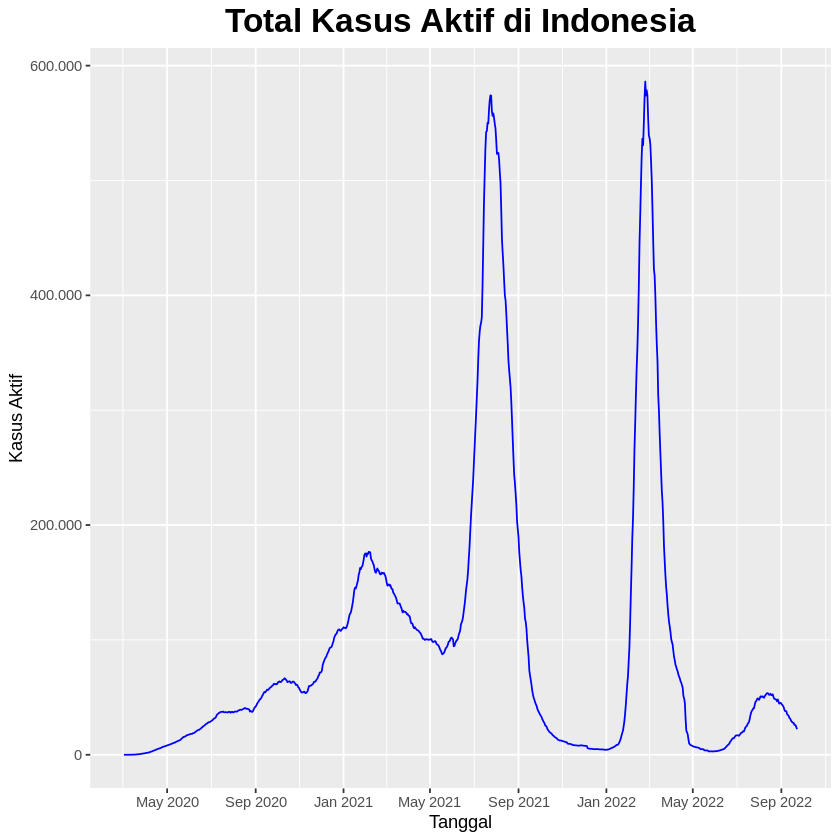

In [ ]:
data <- cov_data[, c('date','kasus_aktif')]
plot <- ggplot(data,
                aes(x=date,y=kasus_aktif))+geom_line(colour="blue")+
                theme(plot.title = element_text(hjust=0.5,size=20,face = "bold"),text = element_text(family="Helvetica")) +
                labs(title="Total Kasus Aktif di Indonesia",
                x="Tanggal",
                y="Kasus Aktif")
plot + scale_y_continuous(labels=comma_format(big.mark = ".",decimal.mark = ",")) +
scale_x_date(date_breaks = "4 month",date_labels = "%b %Y")

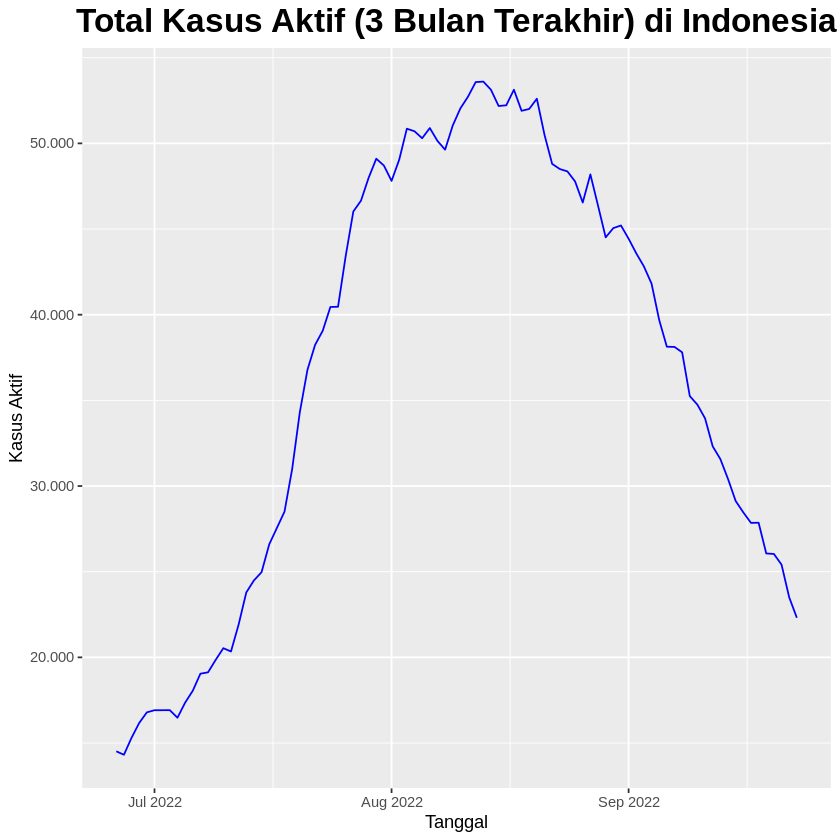

In [ ]:
data <- tail(cov_data[, c('date','kasus_aktif')], n=90)
plot <- ggplot(data,
                aes(x=date,y=kasus_aktif))+geom_line(colour="blue")+
                theme(plot.title = element_text(hjust=0.5,size=20,face = "bold"),text = element_text(family="Helvetica")) +
                labs(title="Total Kasus Aktif (3 Bulan Terakhir) di Indonesia",
                x="Tanggal",
                y="Kasus Aktif")
plot + scale_y_continuous(labels=comma_format(big.mark = ".",decimal.mark = ",")) +
scale_x_date(date_breaks = "1 month",date_labels = "%b %Y")

Kasus aktif COVID-19 di Indonesia terlihat mengalami kenaikan kembali dalam 3 bulan terakhir.

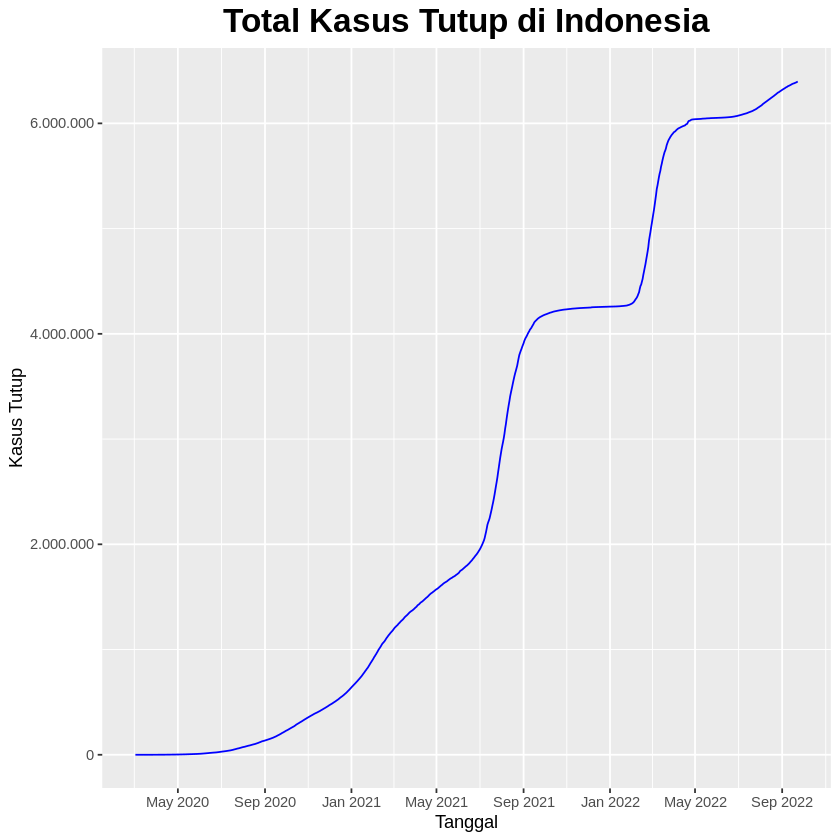

In [ ]:
data <- cov_data[, c('date','kasus_tutup')]
plot <- ggplot(data,
                aes(x=date,y=kasus_tutup))+geom_line(colour="blue")+
                theme(plot.title = element_text(hjust=0.5,size=20,face = "bold")) +
                labs(title="Total Kasus Tutup di Indonesia",
                x="Tanggal",
                y="Kasus Tutup")
plot + scale_y_continuous(labels=comma_format(big.mark = ".",decimal.mark = ",")) +
scale_x_date(date_breaks = "4 month",date_labels = "%b %Y")

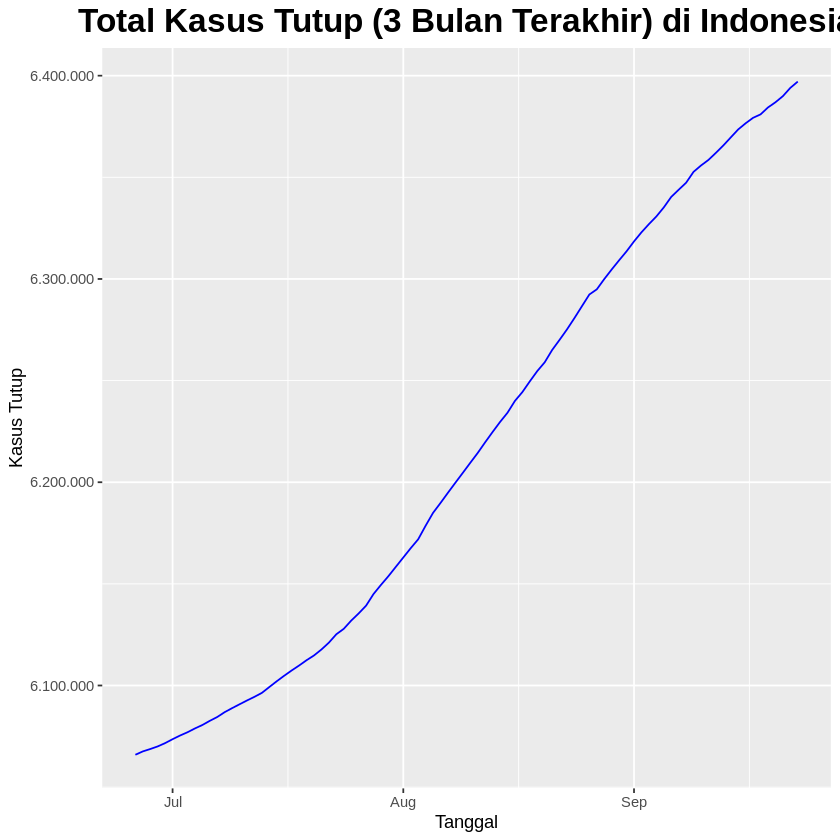

In [ ]:
data <- tail(cov_data[, c('date','kasus_tutup')], n=90)
plot <- ggplot(data,
                aes(x=date,y=kasus_tutup))+geom_line(colour="blue")+
                theme(plot.title = element_text(hjust=0.5,size=20,face = "bold")) +
                labs(title="Total Kasus Tutup (3 Bulan Terakhir) di Indonesia",
                x="Tanggal",
                y="Kasus Tutup")
plot + scale_y_continuous(labels=comma_format(big.mark = ".",decimal.mark = ","))

Kasus tutup COVID-19 di Indonesia terlihat mengalami kenaikan secara eksponensial dalam 3 bulan terakhir.

In [ ]:
cov_data$tahun_minggu_ke <- strftime(cov_data$date,format="%Y/%V")
cov_data_weekwise <- cov_data %>% group_by(tahun_minggu_ke) %>% 
                     summarise(jumlah_positif_kum = last(jumlah_positif_kum),
                               jumlah_sembuh_kum = last(jumlah_sembuh_kum),
                               jumlah_meninggal_kum = last(jumlah_meninggal_kum))
cov_data_weekwise <- cov_data_weekwise[!(grepl("/53",cov_data_weekwise$tahun_minggu_ke,fixed = TRUE) | cov_data_weekwise$tahun_minggu_ke=="2022/52"),]
cov_data_weekwise$minggu_ke <- c(1:nrow(cov_data_weekwise))
cov_data_weekwise <- cov_data_weekwise[2:5]

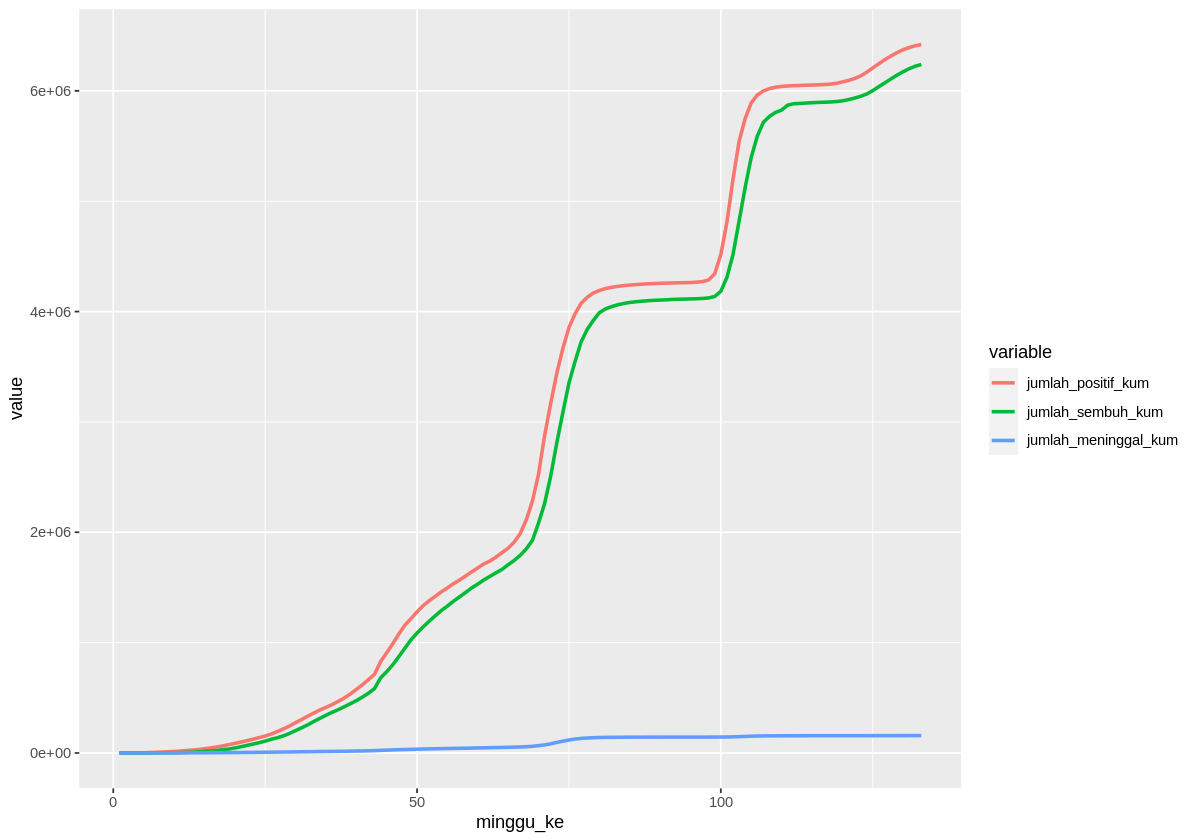

In [ ]:
data <- melt(cov_data_weekwise,id="minggu_ke")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=minggu_ke,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

In [ ]:
cov_data_weekly_increase <- data.frame(
  minggu_ke=cov_data_weekwise$minggu_ke,
  jumlah_positif=c(0,diff(cov_data_weekwise$jumlah_positif_kum)),
  jumlah_sembuh=c(0,diff(cov_data_weekwise$jumlah_sembuh_kum)),
  jumlah_meninggal=c(0,diff(cov_data_weekwise$jumlah_meninggal_kum))
)

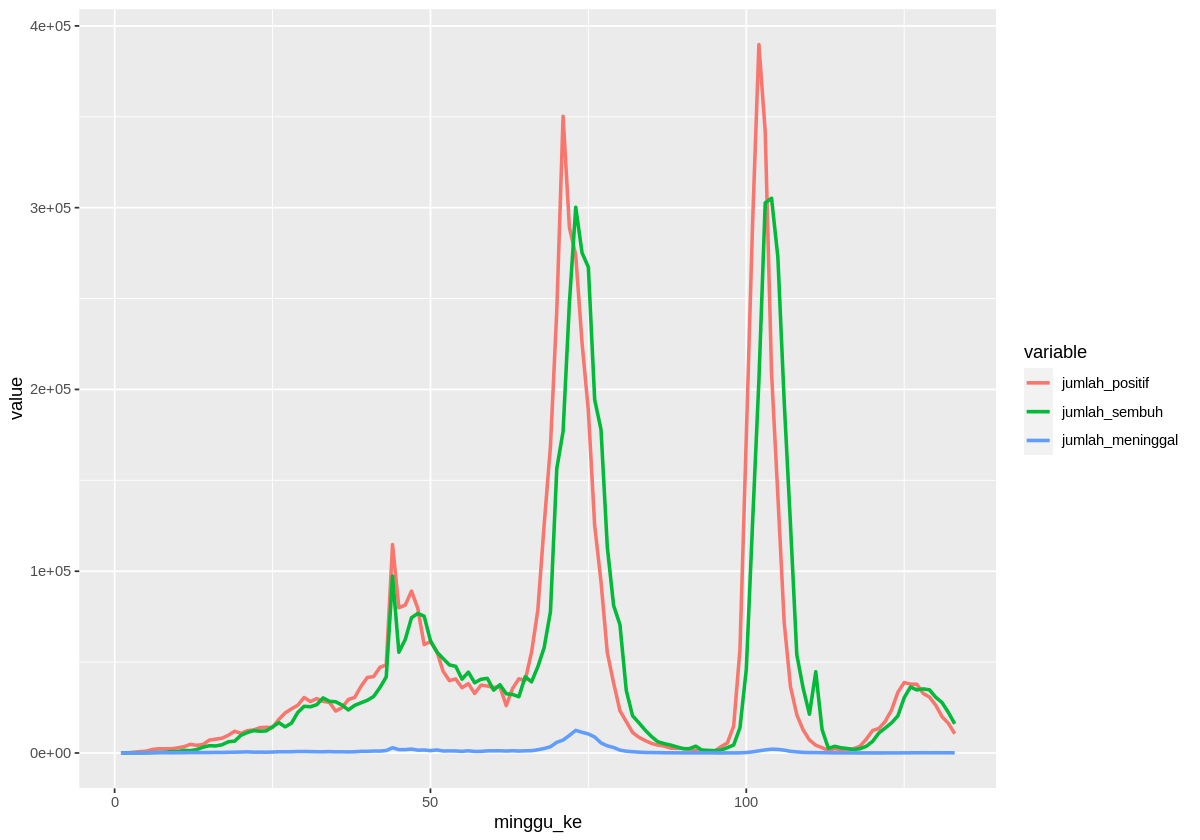

In [ ]:
data <- melt(cov_data_weekly_increase,id="minggu_ke")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=minggu_ke,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

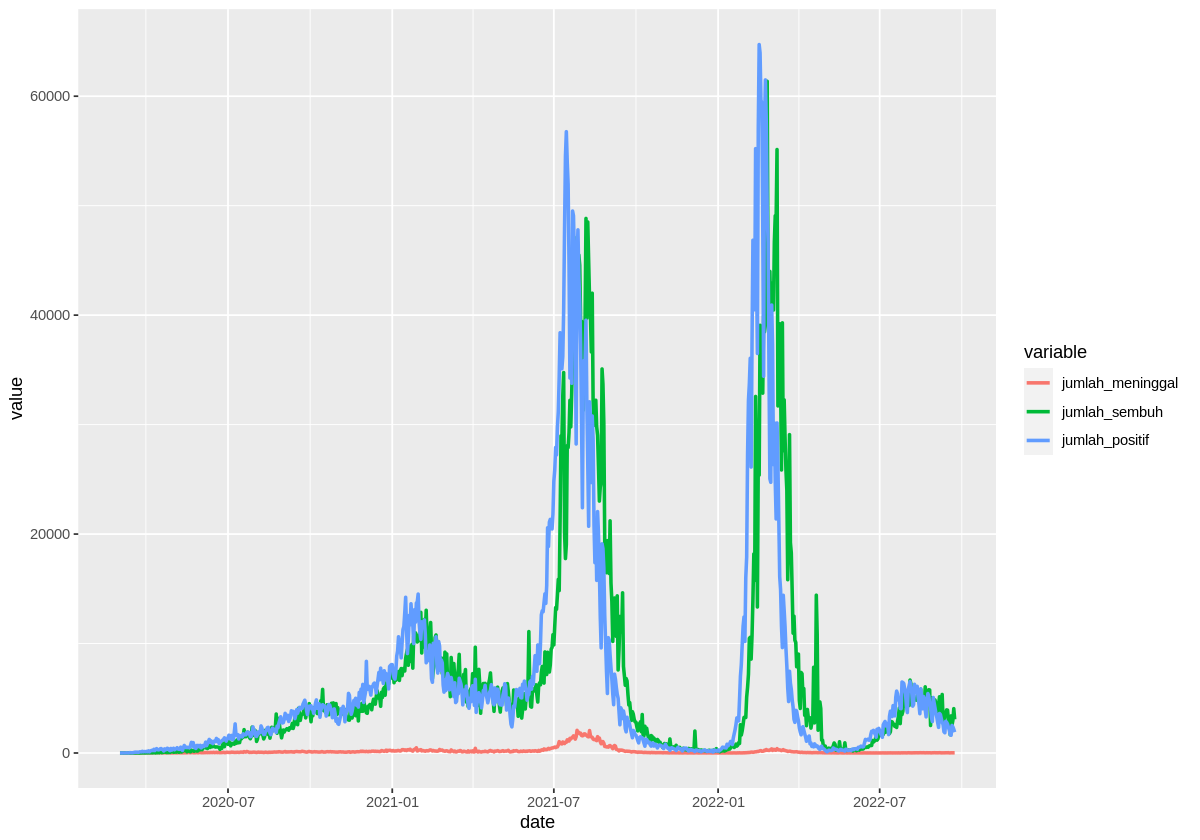

In [ ]:
cov_data_daily_increase <- cov_data[,1:4]
data <- melt(cov_data_daily_increase,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

Rata-rata tingkat kematian 3.516817 %
Median tingkat kematian 2.991108 %
Rata-rata tingkat kesembuhan 78.77751 %
Median tingkat kesembuhan 88.93977 %

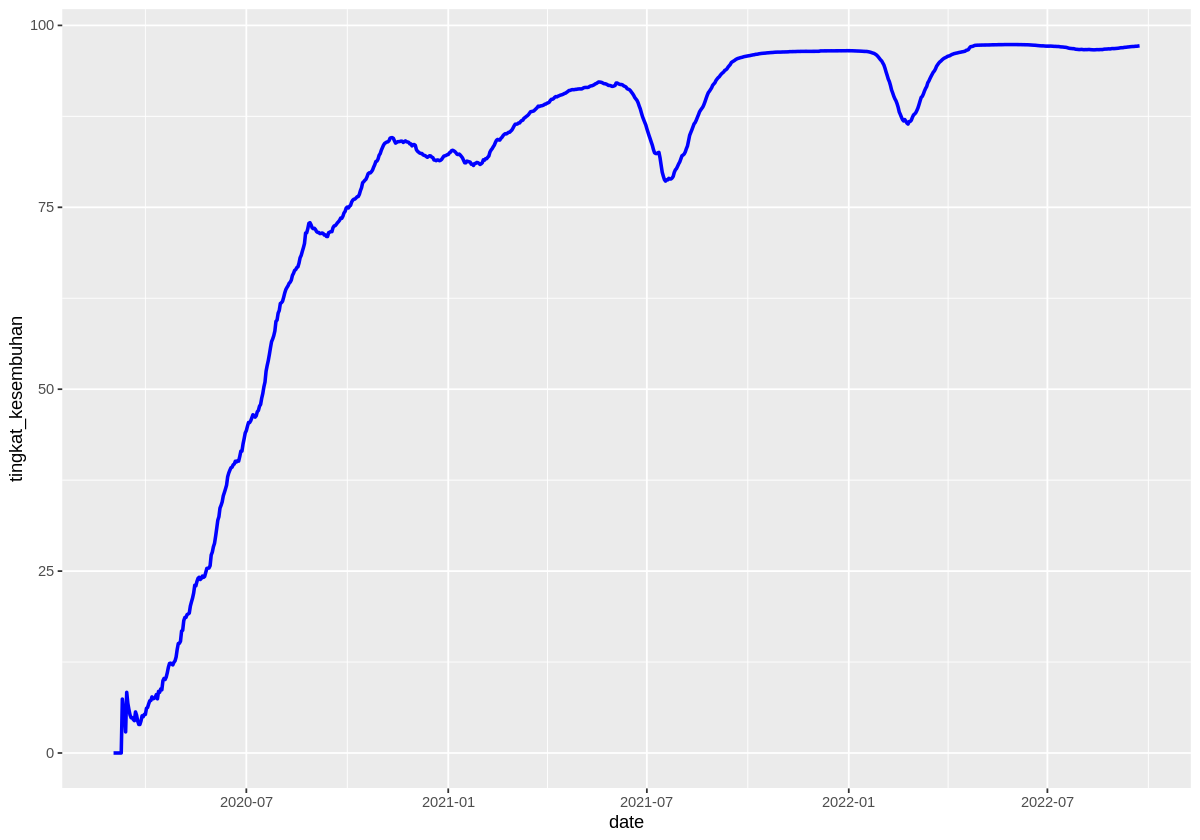

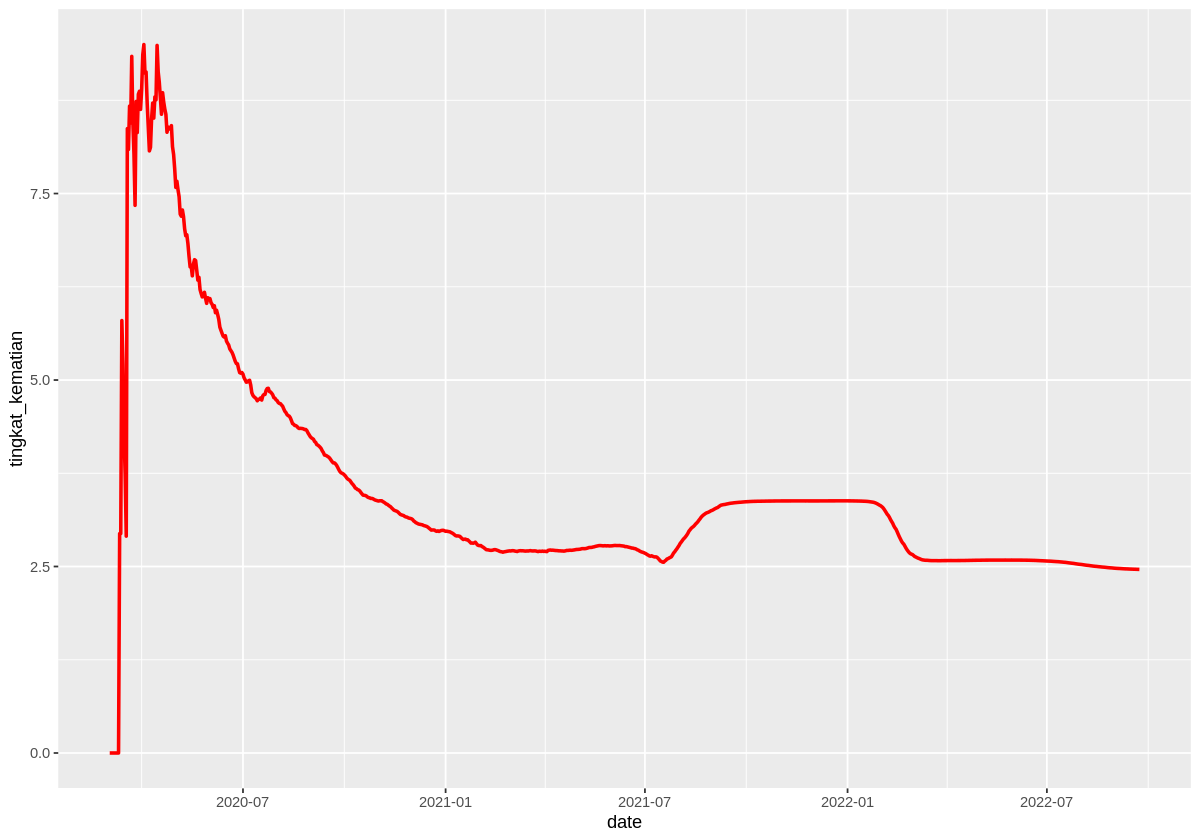

In [ ]:
cov_data$tingkat_kematian <- (cov_data$jumlah_meninggal_kum/cov_data$jumlah_positif_kum)*100
cov_data$tingkat_kesembuhan <- (cov_data$jumlah_sembuh_kum/cov_data$jumlah_positif_kum)*100

cat('Rata-rata tingkat kematian',mean(cov_data$tingkat_kematian),'%\n')
cat('Median tingkat kematian',median(cov_data$tingkat_kematian),'%\n')
cat('Rata-rata tingkat kesembuhan',mean(cov_data$tingkat_kesembuhan),'%\n')
cat('Median tingkat kesembuhan',median(cov_data$tingkat_kesembuhan),'%')

cov_data_tingkat_kesembuhan <- cov_data[,c("date","tingkat_kesembuhan")]
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=cov_data_tingkat_kesembuhan,aes(x=date,y=tingkat_kesembuhan))+
  geom_line(colour="blue",size=1)

cov_data_tingkat_kematian <- cov_data[,c("date","tingkat_kematian")]
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=cov_data_tingkat_kematian,aes(x=date,y=tingkat_kematian))+
  geom_line(colour="red",size=1)

In [ ]:
cov_data$rollmean_jumlah_positif <- c(rep(0,6),rollmean(cov_data$jumlah_positif, k=7))
cov_data$rollmean_jumlah_sembuh <- c(rep(0,6),rollmean(cov_data$jumlah_sembuh, k=7))
cov_data$rollmean_jumlah_meninggal <- c(rep(0,6),rollmean(cov_data$jumlah_meninggal, k=7))

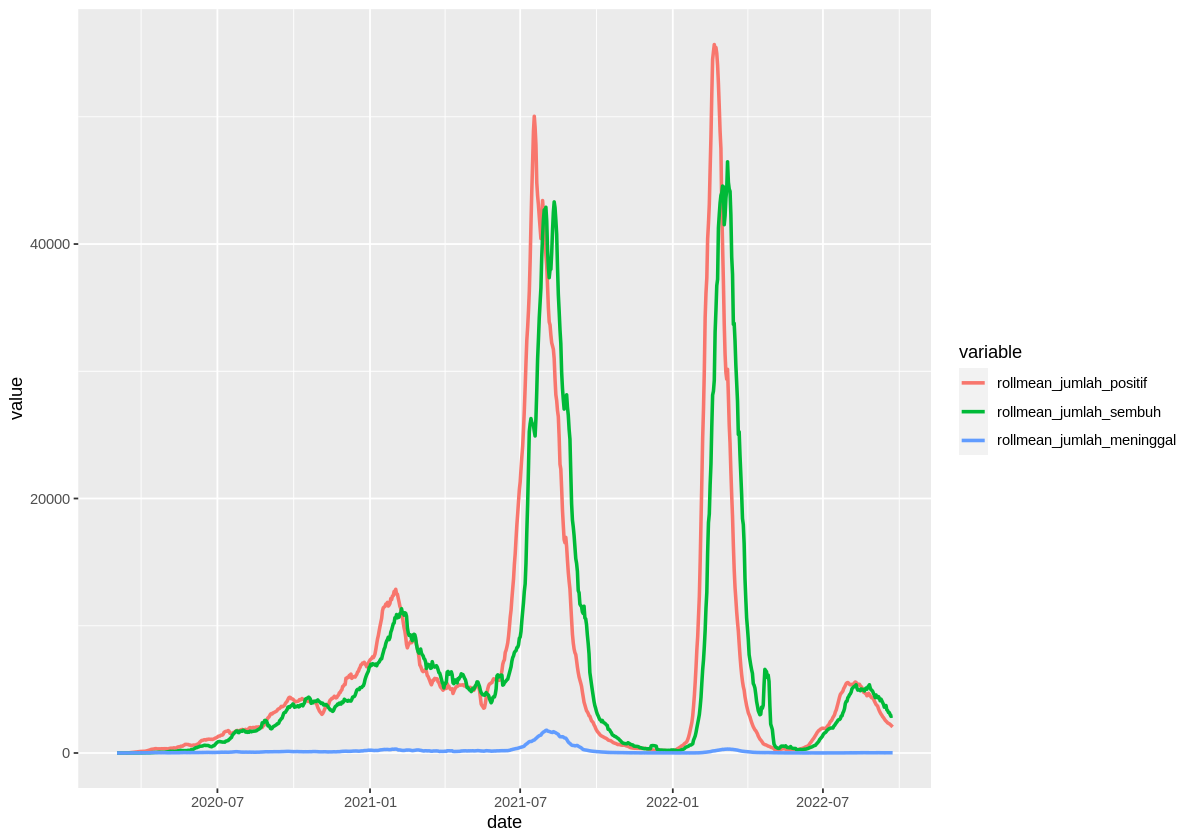

In [ ]:
cov_data_rollmean <- cov_data[c("date","rollmean_jumlah_positif","rollmean_jumlah_sembuh","rollmean_jumlah_meninggal")]

data <- melt(cov_data_rollmean,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

Warning message:
“Removed 18 row(s) containing missing values (geom_path).”


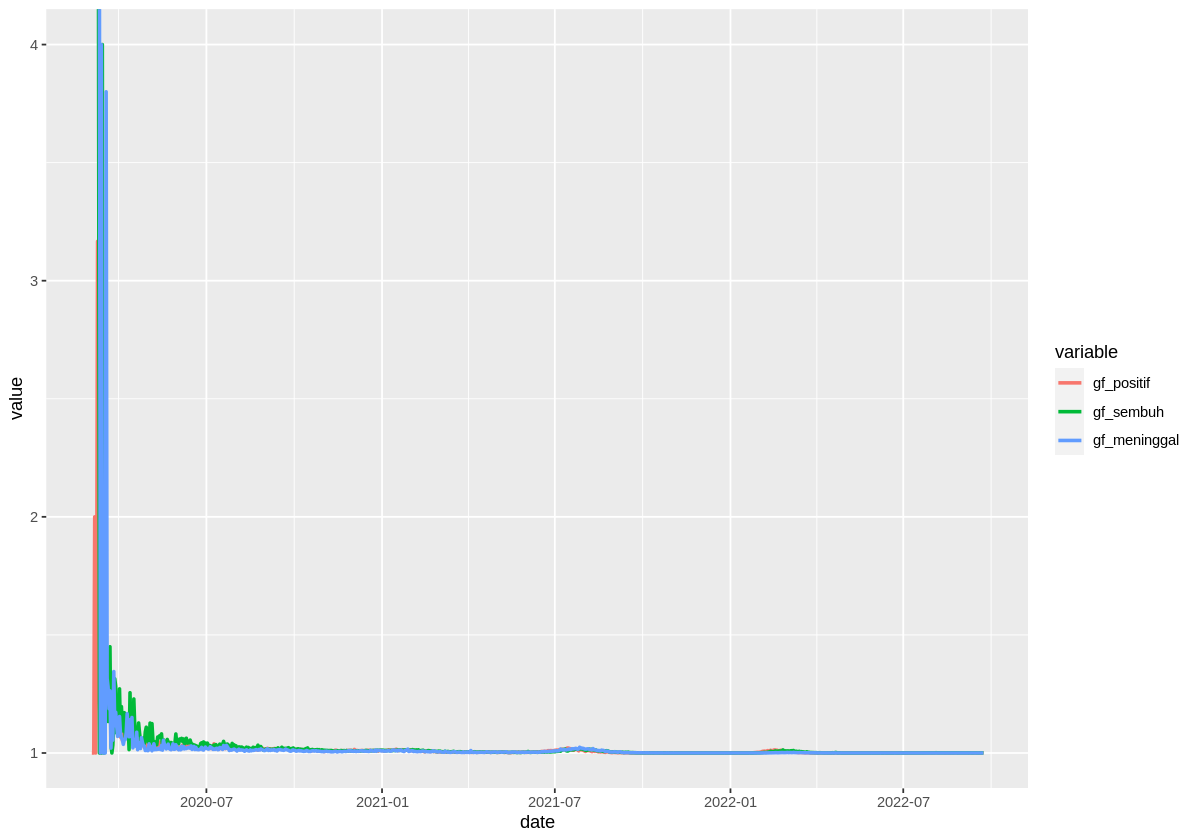

In [ ]:
cov_data_fp <- data.frame(
  date = cov_data$date,
  jumlah_positif_kum = cov_data$jumlah_positif_kum,
  jumlah_positif_kum_prev = lag(cov_data$jumlah_positif_kum),
  jumlah_sembuh_kum = cov_data$jumlah_sembuh_kum,
  jumlah_sembuh_kum_prev = lag(cov_data$jumlah_sembuh_kum),
  jumlah_meninggal_kum = cov_data$jumlah_meninggal_kum,
  jumlah_meninggal_kum_prev = lag(cov_data$jumlah_meninggal_kum)
)

cov_data_fp$gf_positif <- cov_data_fp$jumlah_positif_kum/cov_data_fp$jumlah_positif_kum_prev
cov_data_fp$gf_sembuh <- cov_data_fp$jumlah_sembuh_kum/cov_data_fp$jumlah_sembuh_kum_prev
cov_data_fp$gf_meninggal <- cov_data_fp$jumlah_meninggal_kum/cov_data_fp$jumlah_meninggal_kum_prev

cov_data_fp <- cov_data_fp[c("date","gf_positif","gf_sembuh","gf_meninggal")]

data <- melt(cov_data_fp,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

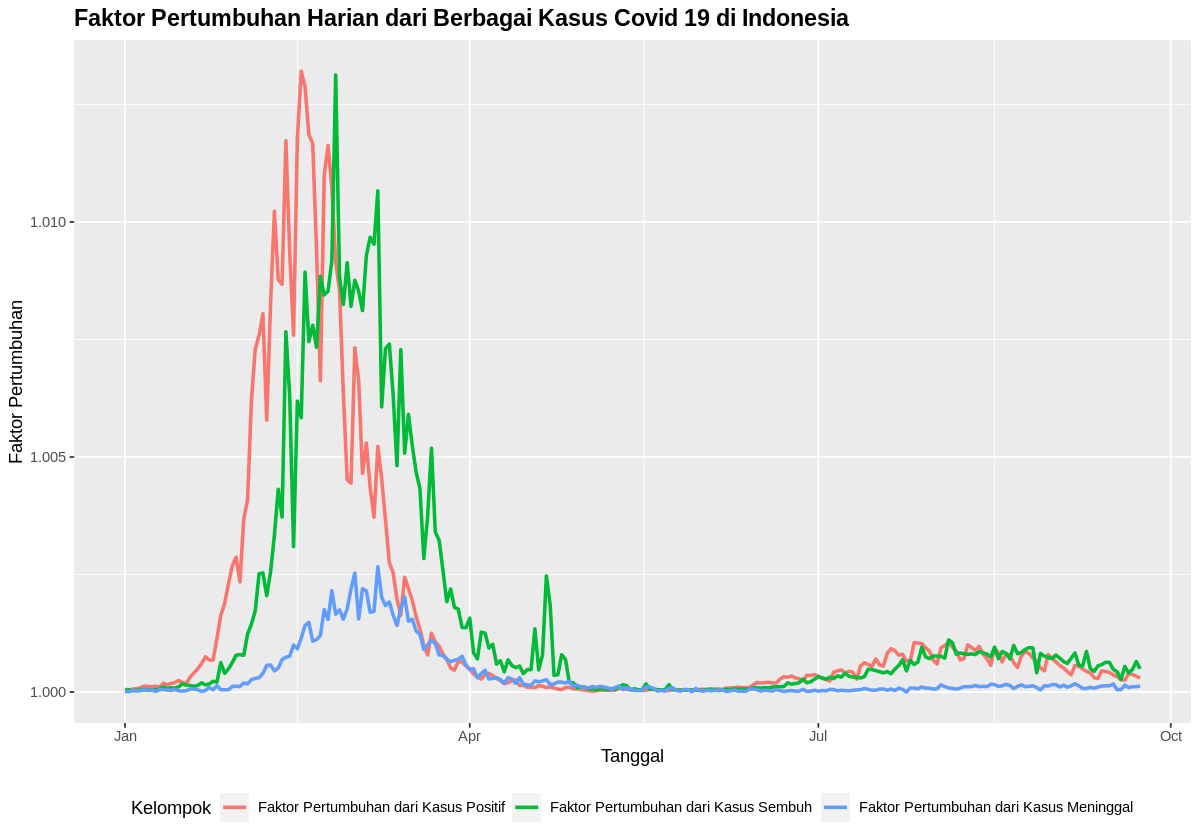

In [ ]:
cov_data_fp <- cov_data_fp[cov_data_fp$date>="2022-01-01",]
colnames(cov_data_fp) <- c("Tanggal",
                           "Faktor Pertumbuhan dari Kasus Positif",
                           "Faktor Pertumbuhan dari Kasus Sembuh",
                           "Faktor Pertumbuhan dari Kasus Meninggal"
                          )
data <- melt(cov_data_fp,id="Tanggal")
colnames(data) <- c("Tanggal","Kelompok","FaktorPertumbuhan")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Tanggal,y=FaktorPertumbuhan,group=Kelompok))+
  geom_line(aes(color=Kelompok),size=1)+ labs(
    title = "Faktor Pertumbuhan Harian dari Berbagai Kasus Covid 19 di Indonesia",
    y = "Faktor Pertumbuhan", x = "Tanggal"
  )+theme(plot.title=element_text(family = "Helvetica", face = "bold", size = (14)),
  legend.position="bottom")

Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


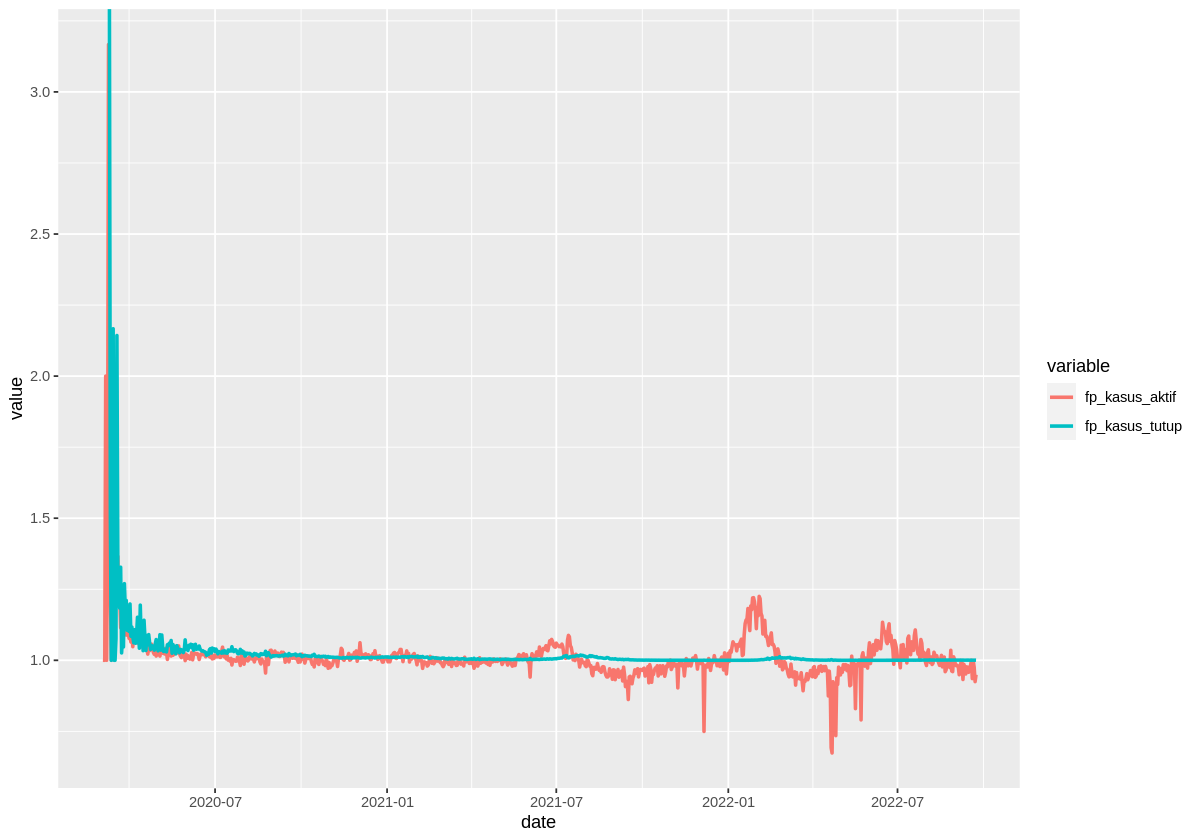

In [ ]:
cov_data_fp_at <- data.frame(
  date = cov_data$date,
  kasus_aktif = cov_data$kasus_aktif,
  kasus_aktif_prev = lag(cov_data$kasus_aktif),
  kasus_tutup = cov_data$kasus_tutup,
  kasus_tutup_prev = lag(cov_data$kasus_tutup)
)

cov_data_fp_at$fp_kasus_aktif <- cov_data_fp_at$kasus_aktif/cov_data_fp_at$kasus_aktif_prev
cov_data_fp_at$fp_kasus_tutup <- cov_data_fp_at$kasus_tutup/cov_data_fp_at$kasus_tutup_prev

cov_data_fp_at <- cov_data_fp_at[c("date","fp_kasus_aktif","fp_kasus_tutup")]

data <- melt(cov_data_fp_at,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

In [ ]:
x=2
double_days=c()
X=c()

while(1){
  double_days <- append(double_days,tail(cov_data[cov_data$jumlah_positif_kum<=x,],n=1)["hari_sejak"][,1])
  X <- append(X,x)
  x <- x*2
  if(x>=max(cov_data$jumlah_positif_kum)){
    break
  }
}

In [ ]:
tingkat_penggandaan <- data.frame(
  jumlah_kasus_positif = X,
  hari_sejak = double_days
)
tingkat_penggandaan$hari_dibutuhkan <- c(tingkat_penggandaan$hari_sejak[1],diff(tingkat_penggandaan$hari_sejak))
tingkat_penggandaan

jumlah_kasus_positif,hari_sejak,hari_dibutuhkan
<dbl>,<drtn>,<drtn>
2,3 days,3 days
4,5 days,2 days
8,6 days,1 days
16,6 days,0 days
32,8 days,2 days
64,10 days,2 days
128,13 days,3 days
256,16 days,3 days
512,19 days,3 days


In [ ]:
x1=7500
hari_1k=c()
X1=c()

while(1){
  hari_1k <- append(hari_1k,tail(cov_data[cov_data$jumlah_positif_kum<=x1,],n=1)["hari_sejak"][,1])
  X1 <- append(X1,x1)
  x1 <- x1+20000
  if(x1>=max(cov_data$jumlah_positif_kum)){
    break
  }
}

In [ ]:
tingkat_1k <- data.frame(
  jumlah_kasus_positif = X1,
  hari_sejak = hari_1k
)
tingkat_1k$hari_dibutuhkan <- c(tingkat_1k$hari_sejak[1],diff(tingkat_1k$hari_sejak))
tingkat_1k

jumlah_kasus_positif,hari_sejak,hari_dibutuhkan
<dbl>,<drtn>,<drtn>
7500,51 days,51 days
27500,91 days,40 days
47500,112 days,21 days
67500,127 days,15 days
87500,139 days,12 days
107500,150 days,11 days
127500,161 days,11 days
147500,171 days,10 days
167500,179 days,8 days


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



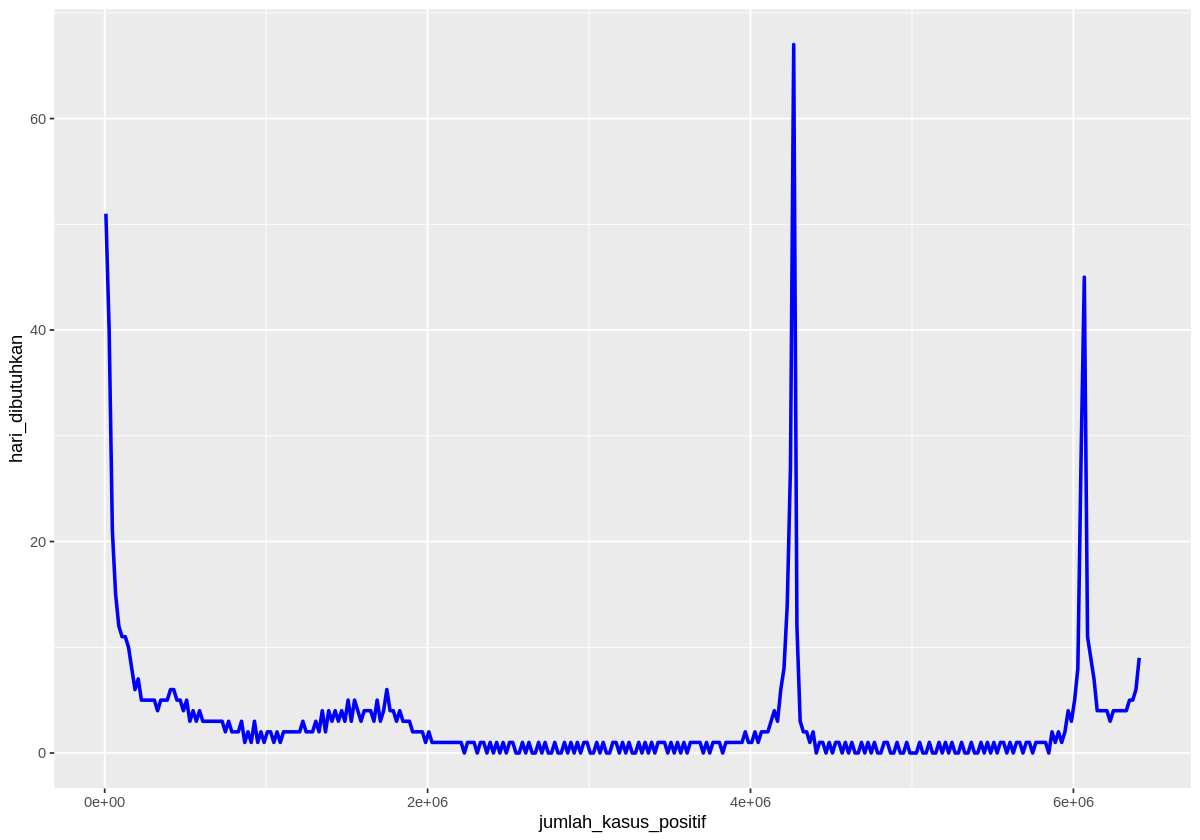

In [ ]:
# tingkat_1k <- cov_data[,c("date","tingkat_kesembuhan")]
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=tingkat_1k,aes(x=jumlah_kasus_positif,y=hari_dibutuhkan))+
  geom_line(colour="blue",size=1)

## Ramalan dengan Model Machine Learning

### Regresi Linear

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
test_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])

In [ ]:
model <- lm(formula=jumlah_positif_kum~as.integer(hari_sejak), data=train_set)
summary(model)


Call:
lm(formula = jumlah_positif_kum ~ as.integer(hari_sejak), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-866642 -539384  -25817  459672 1227056 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.227e+06  3.616e+04  -33.93   <2e-16 ***
as.integer(hari_sejak)  8.555e+03  7.051e+01  121.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 539600 on 887 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9431 
F-statistic: 1.472e+04 on 1 and 887 DF,  p-value: < 2.2e-16


In [ ]:
model_residuals <- as.data.frame(residuals(model))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



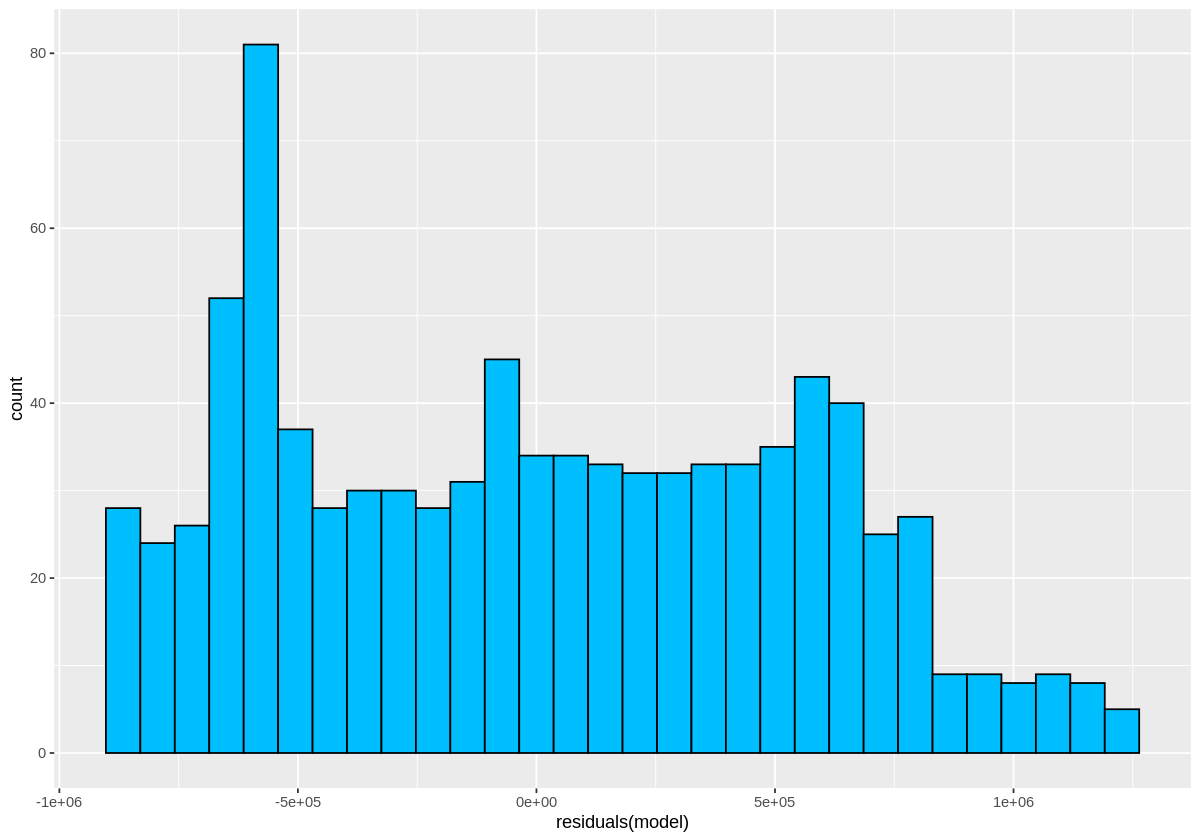

In [ ]:
ggplot(model_residuals,aes(residuals(model))) + geom_histogram(fill="deepskyblue",color="black")

In [ ]:
ks.test(model_residuals,"pnorm")


	One-sample Kolmogorov-Smirnov test

data:  model_residuals
D = 0.51294, p-value < 2.2e-16
alternative hypothesis: two-sided


In [ ]:
preds <- predict(model,test_set)

In [ ]:
model_eval <- cbind(test_set$jumlah_positif_kum,preds)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk Linear Regression:",rmse)

Root Mean Square Error untuk Linear Regression: 235163.5

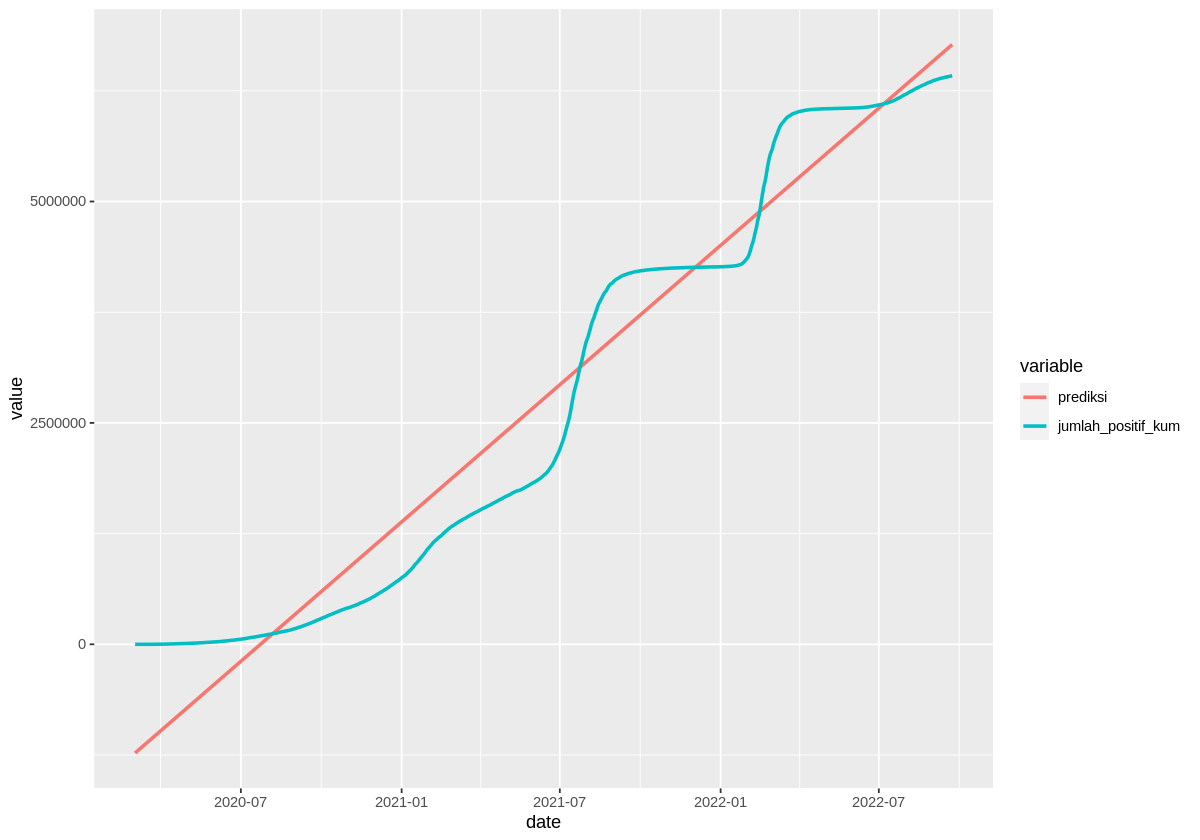

In [ ]:
prediksi_all <- predict(model,cov_data)
prediksi_all <- as.data.frame(prediksi_all)

data <- cbind(cov_data$date,prediksi_all,cov_data$jumlah_positif_kum)
colnames(data) <- c("date","prediksi","jumlah_positif_kum")
data <- melt(data,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### Regresi Polinomial

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
test_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])

In [ ]:
x=c()

for (i in 2:10){
  model <- lm(formula=jumlah_positif_kum~poly(as.integer(hari_sejak),i,raw = TRUE), data=train_set)
  preds <- predict(model,test_set)
  model_eval <- cbind(test_set$jumlah_positif_kum,preds)
  colnames(model_eval) <- c("Actual","Predicted")
  model_eval <- as.data.frame(model_eval)
  mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
  rmse <- sqrt(mse)
  x <- append(x,rmse)
}
list_rmse=data.frame(
  degree=2:10,
  rmse_value=x
)
list_rmse
cat("Derajat regresi polinomial terbaik adalah pada derajat",list_rmse[list_rmse$rmse_value==min(list_rmse$rmse_value),]$degree,".")


degree,rmse_value
<int>,<dbl>
2,1125026.17
3,90134.99
4,250124.23
5,70674.48
6,194252.62
7,1530831.67
8,2407238.37
9,777637.51
10,7627669.35


Derajat regresi polinomial terbaik adalah pada derajat 5 .

In [ ]:
model <- lm(formula=jumlah_positif_kum~poly(as.integer(hari_sejak),4,raw = TRUE), 
            data=train_set)
summary(model)


Call:
lm(formula = jumlah_positif_kum ~ poly(as.integer(hari_sejak), 
    4, raw = TRUE), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-781118  -64869   14027   54466  768991 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                   9.897e+04  4.890e+04   2.024
poly(as.integer(hari_sejak), 4, raw = TRUE)1 -2.465e+03  7.639e+02  -3.227
poly(as.integer(hari_sejak), 4, raw = TRUE)2  1.234e+01  3.501e+00   3.525
poly(as.integer(hari_sejak), 4, raw = TRUE)3  1.757e-02  5.926e-03   2.965
poly(as.integer(hari_sejak), 4, raw = TRUE)4 -2.214e-05  3.310e-06  -6.687
                                             Pr(>|t|)    
(Intercept)                                  0.043257 *  
poly(as.integer(hari_sejak), 4, raw = TRUE)1 0.001298 ** 
poly(as.integer(hari_sejak), 4, raw = TRUE)2 0.000445 ***
poly(as.integer(hari_sejak), 4, raw = TRUE)3 0.003112 ** 
poly(as.integer(hari_sejak), 4, raw = TRUE

In [ ]:
preds <- predict(model,test_set)

In [ ]:
model_eval <- cbind(test_set$jumlah_positif_kum,preds)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk Polynomial Regression:",rmse)

Root Mean Square Error untuk Polynomial Regression: 250124.2

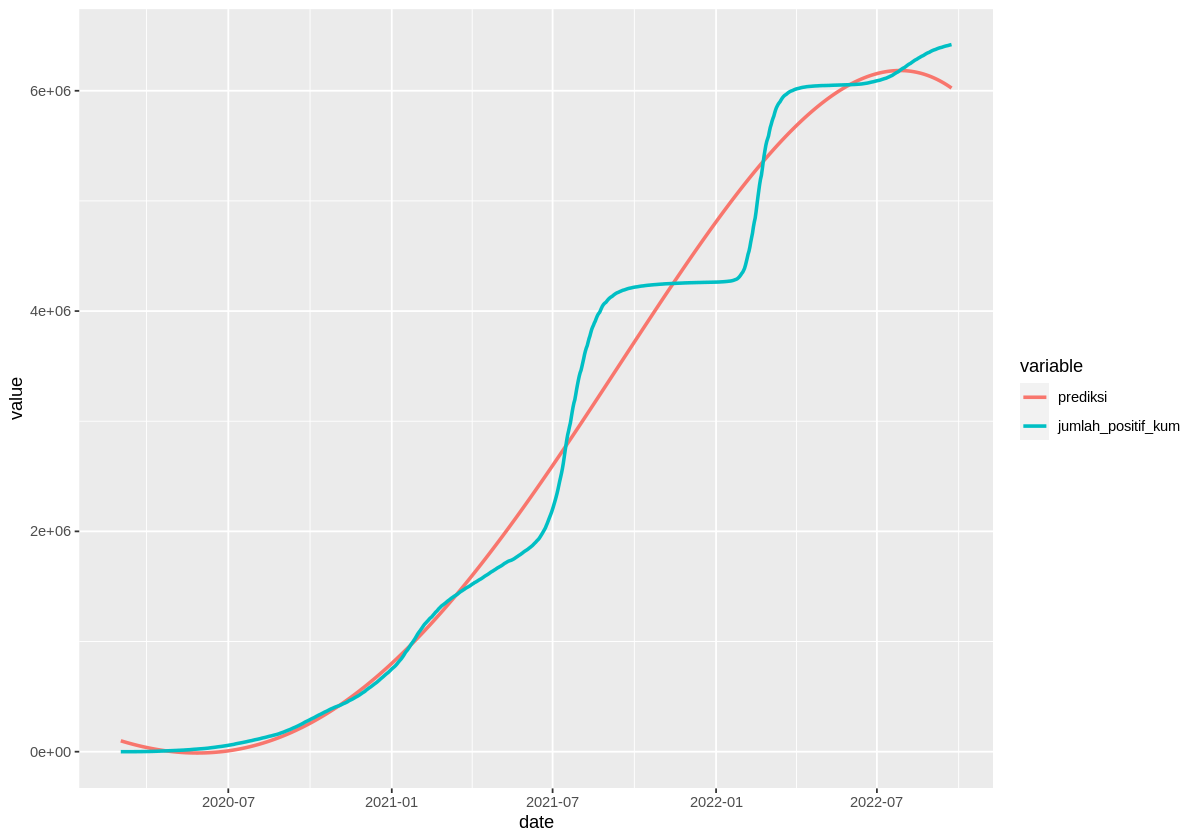

In [ ]:
prediksi_all <- predict(model,cov_data)
prediksi_all <- as.data.frame(prediksi_all)

data <- cbind(cov_data$date,prediksi_all,cov_data$jumlah_positif_kum)
colnames(data) <- c("date","prediksi","jumlah_positif_kum")
data <- melt(data,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### Support Vector Machine Model Regressor

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
test_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])

In [ ]:
model <- svm(jumlah_positif_kum~date,train_set)
summary(model)


Call:
svm(formula = jumlah_positif_kum ~ date, data = train_set)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  291






In [ ]:
preds <- predict(model,test_set)

In [ ]:
model_eval <- cbind(test_set$jumlah_positif_kum,preds)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk model SVM:",rmse)

Root Mean Square Error untuk model SVM: 410988.9

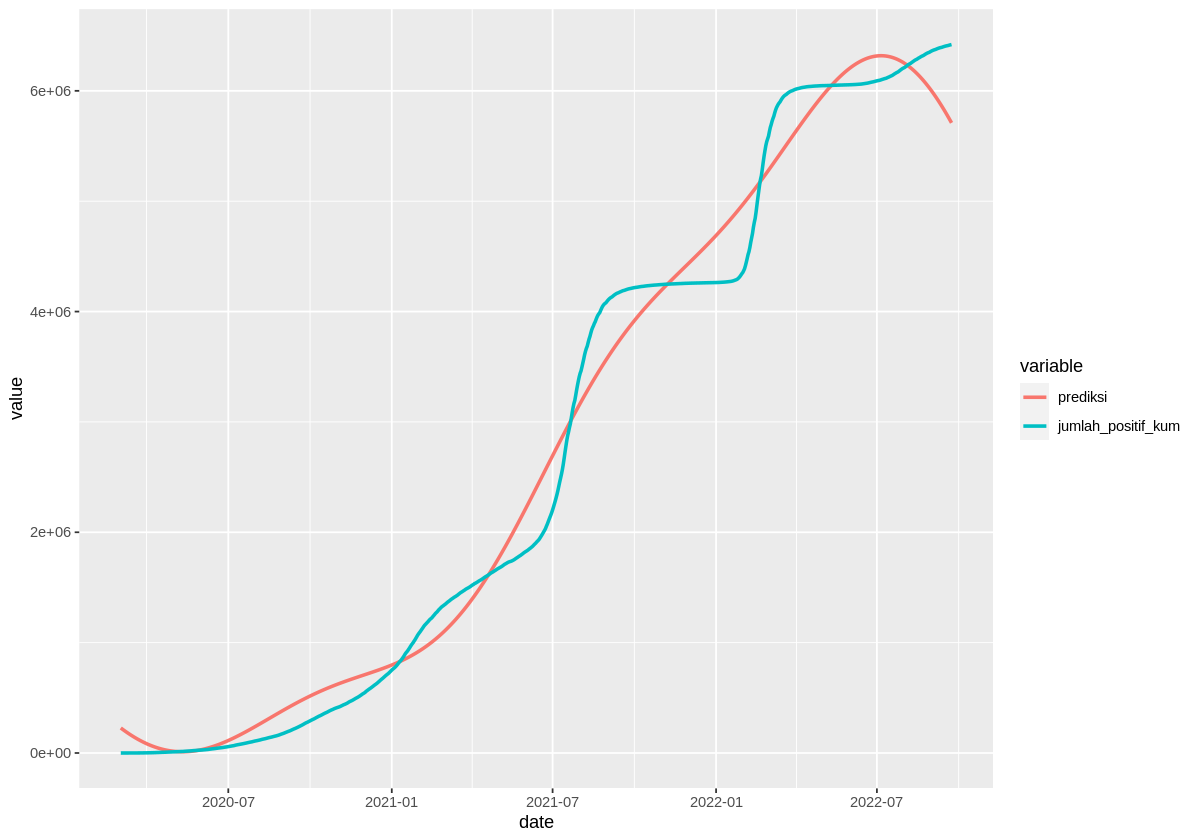

In [ ]:
prediksi_all <- predict(model,cov_data)
prediksi_all <- as.data.frame(prediksi_all)

data <- cbind(cov_data$date,prediksi_all,cov_data$jumlah_positif_kum)
colnames(data) <- c("date","prediksi","jumlah_positif_kum")
data <- melt(data,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

In [ ]:
W = t(model$coefs) %*% model$SV
b = model$rho

In [ ]:
opt_model_svm <- tune(svm, jumlah_positif_kum~date, data=train_set,ranges=list(elsilon=seq(0,1,0.1), cost=1:10))
print(opt_model_svm)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 elsilon cost
       0   10

- best performance: 57404756412 



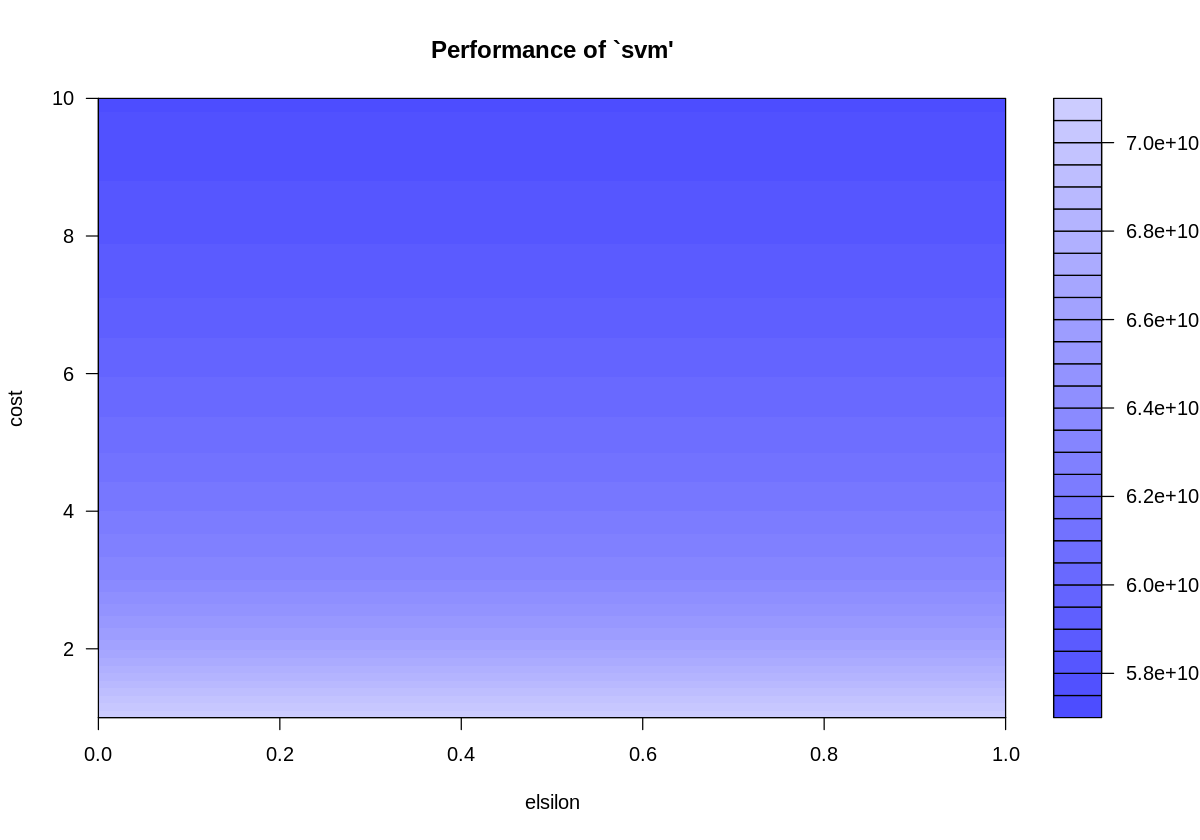

In [ ]:
plot(opt_model_svm)

In [ ]:
# Mencari model terbaik
best_model = opt_model_svm$best.model
# Memprediksi Y menggunakan model terbaik
pred_best = predict(best_model,test_set)


In [ ]:
model_eval <- cbind(test_set$jumlah_positif_kum,pred_best)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk Linear Regression:",rmse)

Root Mean Square Error untuk Linear Regression: 1006383

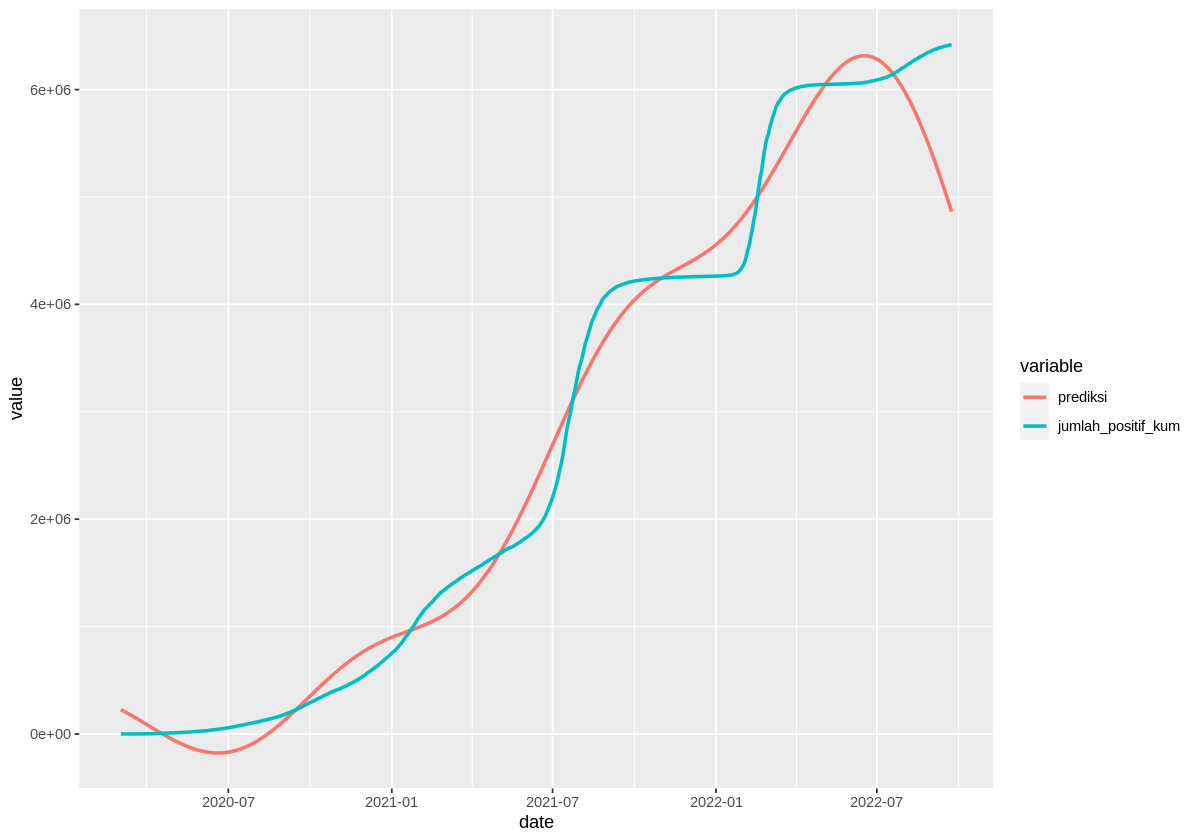

In [ ]:
prediksi_all <- predict(best_model,cov_data)
prediksi_all <- as.data.frame(prediksi_all)

data <- cbind(cov_data$date,prediksi_all,cov_data$jumlah_positif_kum)
colnames(data) <- c("date","prediksi","jumlah_positif_kum")
data <- melt(data,id="date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### Holt's Linear Model

In [ ]:
cov_data_xts <- xts(cov_data$jumlah_positif_kum,cov_data$date)

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

In [ ]:
model_holt <- holt(train_set_xts,alpha=0.4,beta=0.4,plot = FALSE)
y_pred$Holt <- predict(model_holt$model,nrow(valid_set))$mean

In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$Holt)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk Holt's Linear Model:",rmse)
#rmse(valid_set$jumlah_positif_kum,y_pred$Holt)

Root Mean Square Error untuk Holt's Linear Model: 42406.86

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


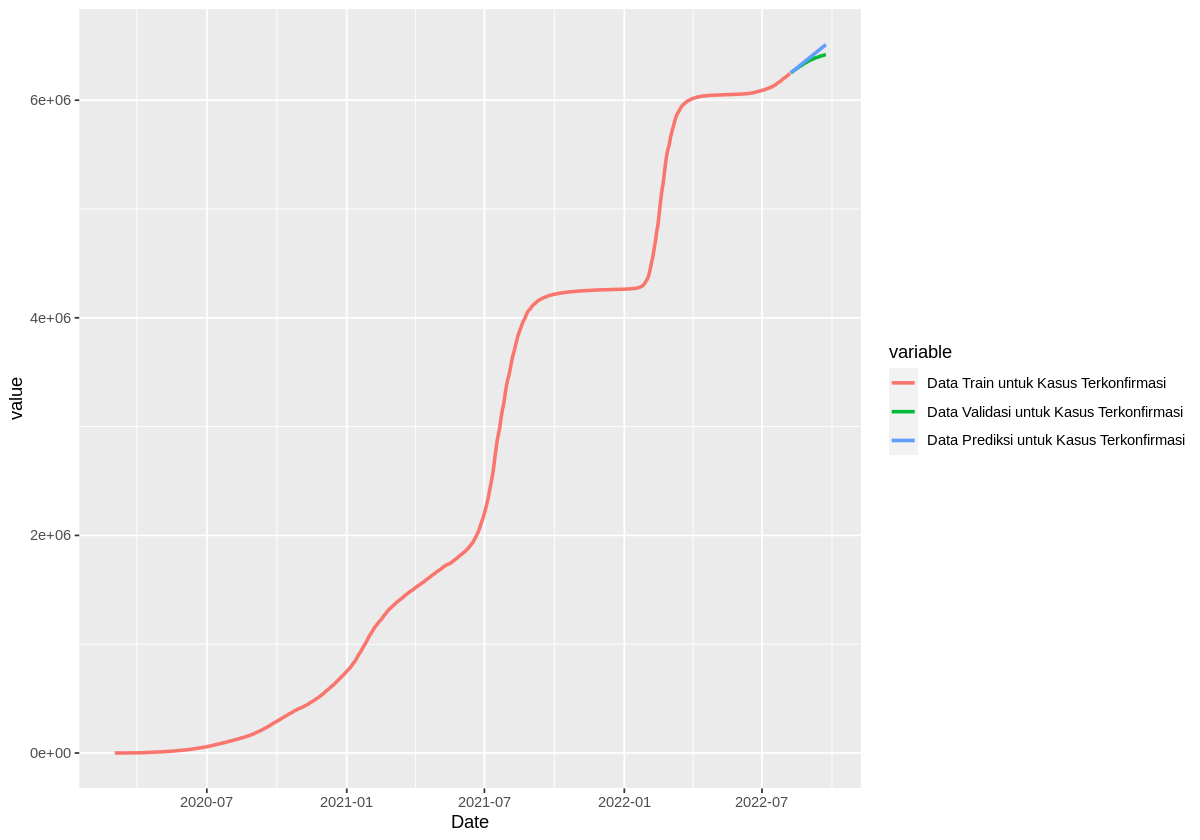

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","Holt")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### Holt's Winter Model untuk Time Series Harian

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

In [ ]:
train_set_ts <- ts(train_set[,c("jumlah_positif_kum")],frequency = 7)
model_hw <- ets(train_set_ts,model = "MAM")
model_hw

ETS(M,A,M) 

Call:
 ets(y = train_set_ts, model = "MAM") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.081 
    gamma = 1e-04 

  Initial states:
    l = -28.4313 
    b = 8.1334 
    s = 0.9993 1.0018 1.0036 0.9966 0.9974 0.9997
           1.0017

  sigma:  0.0781

     AIC     AICc      BIC 
25641.19 25641.55 25698.67 

In [ ]:
#model_hw <- hw(train_set_ts,seasonal = "multiplicative")
y_pred$HoltWinter <- predict(model_hw,nrow(valid_set))$mean


In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$HoltWinter)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk Holt's Linear Model:",rmse)

Root Mean Square Error untuk Holt's Linear Model: 37112.24

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


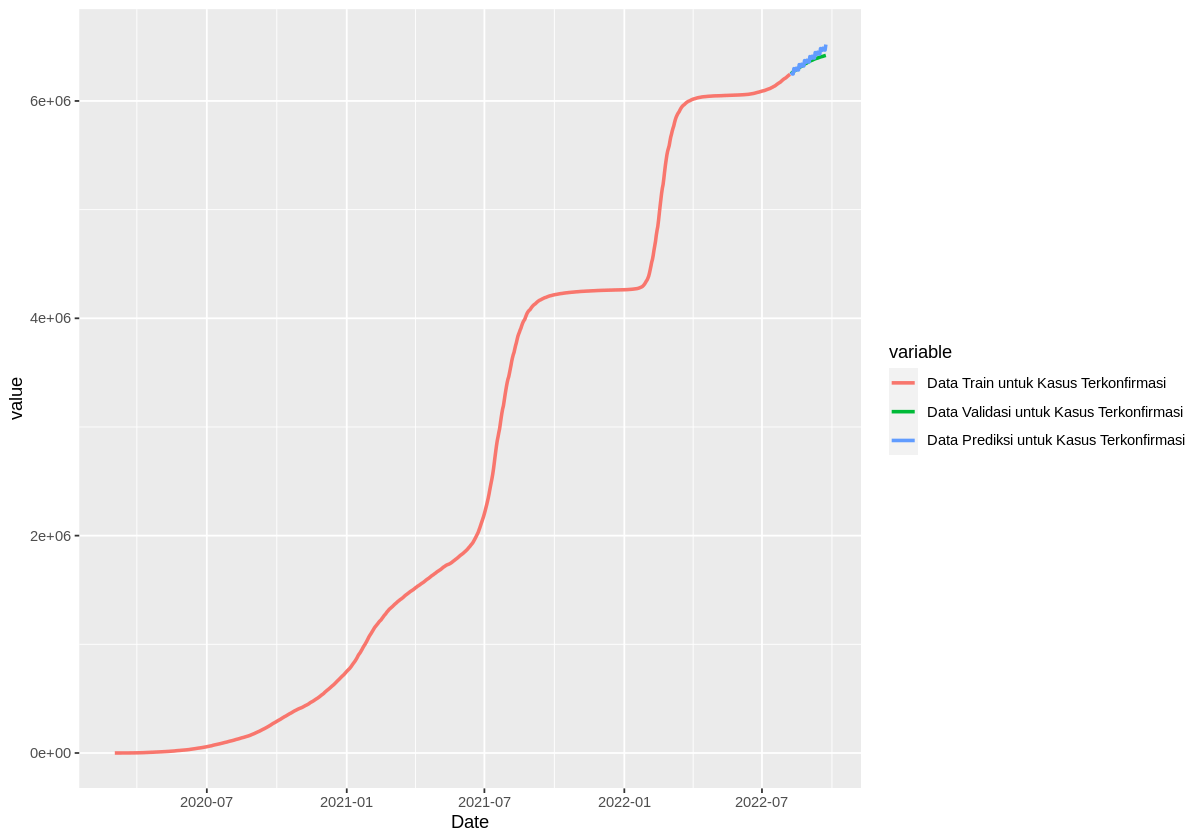

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","HoltWinter")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### AR Model

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

In [ ]:
model_ar <- auto.arima(train_set$jumlah_positif_kum,start.p = 0,start.q = 0,max.p = 5,max.q = 0,trace = TRUE,stepwise = FALSE,seasonal = FALSE)


 Fitting models using approximations to speed things up...

 ARIMA(0,2,0)                    : 16399.58
 ARIMA(1,2,0)                    : 16402.09
 ARIMA(2,2,0)                    : 16340.97
 ARIMA(3,2,0)                    : 16343.96
 ARIMA(4,2,0)                    : 16328.1
 ARIMA(5,2,0)                    : 16300.03

 Now re-fitting the best model(s) without approximations...




 Best model: ARIMA(5,2,0)                    



In [ ]:
y_pred$ARModel <- predict(model_ar,nrow(valid_set))$pred

In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$ARModel)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk AR Model:",rmse)

Root Mean Square Error untuk AR Model: 24403.55

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


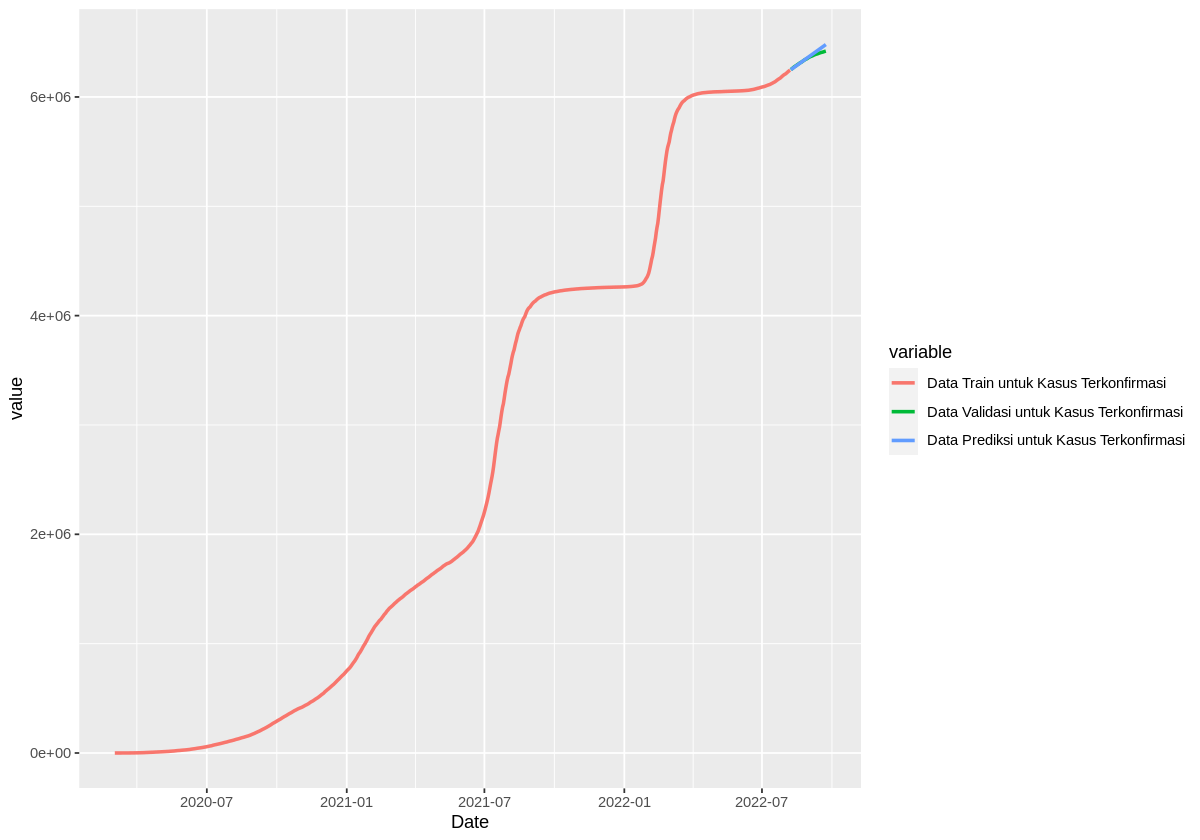

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","ARModel")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### MA Model

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

In [ ]:
model_ma <- auto.arima(train_set$jumlah_positif_kum,start.p = 0,start.q = 0,max.p = 0,max.q = 2,trace = TRUE,stepwise = FALSE,seasonal = FALSE)


 Fitting models using approximations to speed things up...

 ARIMA(0,2,0)                    : 16399.58
 ARIMA(0,2,1)                    : 16400.53
 ARIMA(0,2,2)                    : 16326.7

 Now re-fitting the best model(s) without approximations...




 Best model: ARIMA(0,2,2)                    



In [ ]:
y_pred$MAModel <- predict(model_ma,nrow(valid_set))$pred

In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$MAModel)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk MA Model:",rmse)

Root Mean Square Error untuk MA Model: 19119.68

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


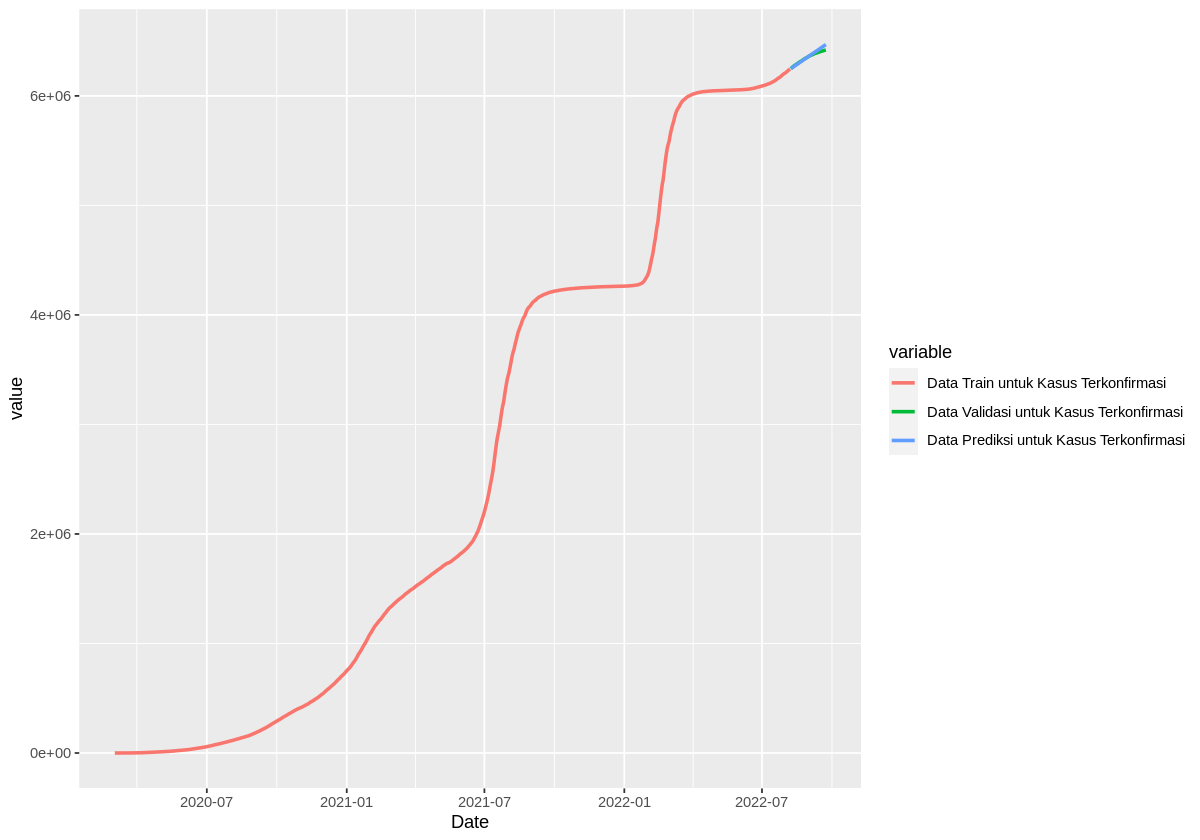

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","MAModel")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### ARIMA Model

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

In [ ]:
model_arima <- auto.arima(train_set$jumlah_positif_kum,start.p = 0,start.q = 0,max.p = 5,max.q = 2,trace = TRUE,stepwise = FALSE,seasonal = FALSE)


 Fitting models using approximations to speed things up...

 ARIMA(0,2,0)                    : 16399.58
 ARIMA(0,2,1)                    : 16400.53
 ARIMA(0,2,2)                    : 16326.7
 ARIMA(1,2,0)                    : 16402.09
 ARIMA(1,2,1)                    : 16379.55
 ARIMA(1,2,2)                    : 16327.46
 ARIMA(2,2,0)                    : 16340.97
 ARIMA(2,2,1)                    : 16342.69
 ARIMA(2,2,2)                    : 16327.95
 ARIMA(3,2,0)                    : 16343.96
 ARIMA(3,2,1)                    : 16336.13
 ARIMA(3,2,2)                    : 16327.51
 ARIMA(4,2,0)                    : 16328.1
 ARIMA(4,2,1)                    : 16320.75
 ARIMA(5,2,0)                    : 16300.03

 Now re-fitting the best model(s) without approximations...




 Best model: ARIMA(5,2,0)                    



In [ ]:
y_pred$ARIMAModel <- predict(model_arima,nrow(valid_set))$pred

In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$ARIMAModel)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk ARIMA Model:",rmse)

Root Mean Square Error untuk ARIMA Model: 24403.55

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


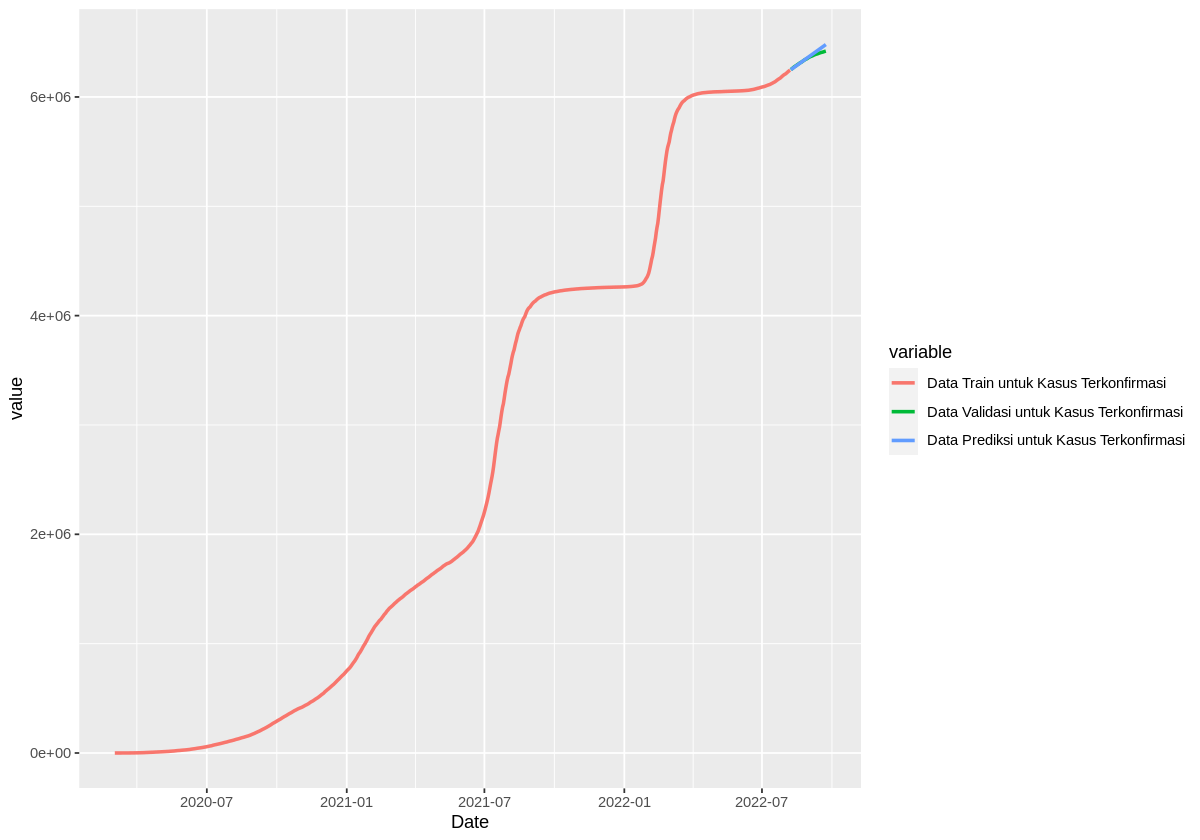

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","ARIMAModel")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)

### SARIMA Model

In [ ]:
proporsi_data <- 0.95
train_set <- cov_data %>% slice(1:as.integer(dim(cov_data)[1]*proporsi_data))
train_set_xts <- xts(train_set$jumlah_positif_kum,train_set$date)
valid_set <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
valid_set_xts <- xts(valid_set$jumlah_positif_kum,valid_set$date)
y_pred <- cov_data %>% slice(as.integer((dim(cov_data)[1]*proporsi_data)+1):dim(cov_data)[1])
y_pred_xts <- xts(y_pred$jumlah_positif_kum,y_pred$date)

train_set_ts <- ts(train_set$jumlah_positif_kum, frequency = 7)

In [ ]:
model_sarima <- auto.arima(train_set_ts,start.p = 0,start.q = 0,max.p = 5,max.q = 2,trace = TRUE,stepwise = FALSE,seasonal = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(0,2,0)                              : 16399.58
 ARIMA(0,2,0)(0,0,1)[7]                    : 16219.03
 ARIMA(0,2,0)(0,0,2)[7]                    : 16112.18
 ARIMA(0,2,0)(1,0,0)[7]                    : 16104.91
 ARIMA(0,2,0)(1,0,1)[7]                    : 16069.5
 ARIMA(0,2,0)(1,0,2)[7]                    : 16062.7
 ARIMA(0,2,0)(2,0,0)[7]                    : 16067.68
 ARIMA(0,2,0)(2,0,1)[7]                    : 16068.91
 ARIMA(0,2,0)(2,0,2)[7]                    : 16068.51
 ARIMA(0,2,1)                              : 16400.53
 ARIMA(0,2,1)(0,0,1)[7]                    : 16209.24
 ARIMA(0,2,1)(0,0,2)[7]                    : 16095.08
 ARIMA(0,2,1)(1,0,0)[7]                    : 16081.95
 ARIMA(0,2,1)(1,0,1)[7]                    : 16052.55
 ARIMA(0,2,1)(1,0,2)[7]                    : 16045.75
 ARIMA(0,2,1)(2,0,0)[7]                    : 16051.28
 ARIMA(0,2,1)(2,0,1)[7]                    : 16050.77
 ARIMA(0,2,1)(2,0,2)[7]

In [ ]:
y_pred$SARIMAModel <- predict(model_sarima,nrow(valid_set))$pred

In [ ]:
model_eval <- cbind(valid_set$jumlah_positif_kum,y_pred$SARIMAModel)
colnames(model_eval) <- c("Actual","Predicted")
model_eval <- as.data.frame(model_eval)

In [ ]:
mse <- mean((model_eval$Actual-model_eval$Predicted)^2)
rmse <- sqrt(mse)
cat("Root Mean Square Error untuk ARIMA Model:",rmse)

Root Mean Square Error untuk ARIMA Model: 27122.49

Warning message:
“Removed 1825 row(s) containing missing values (geom_path).”


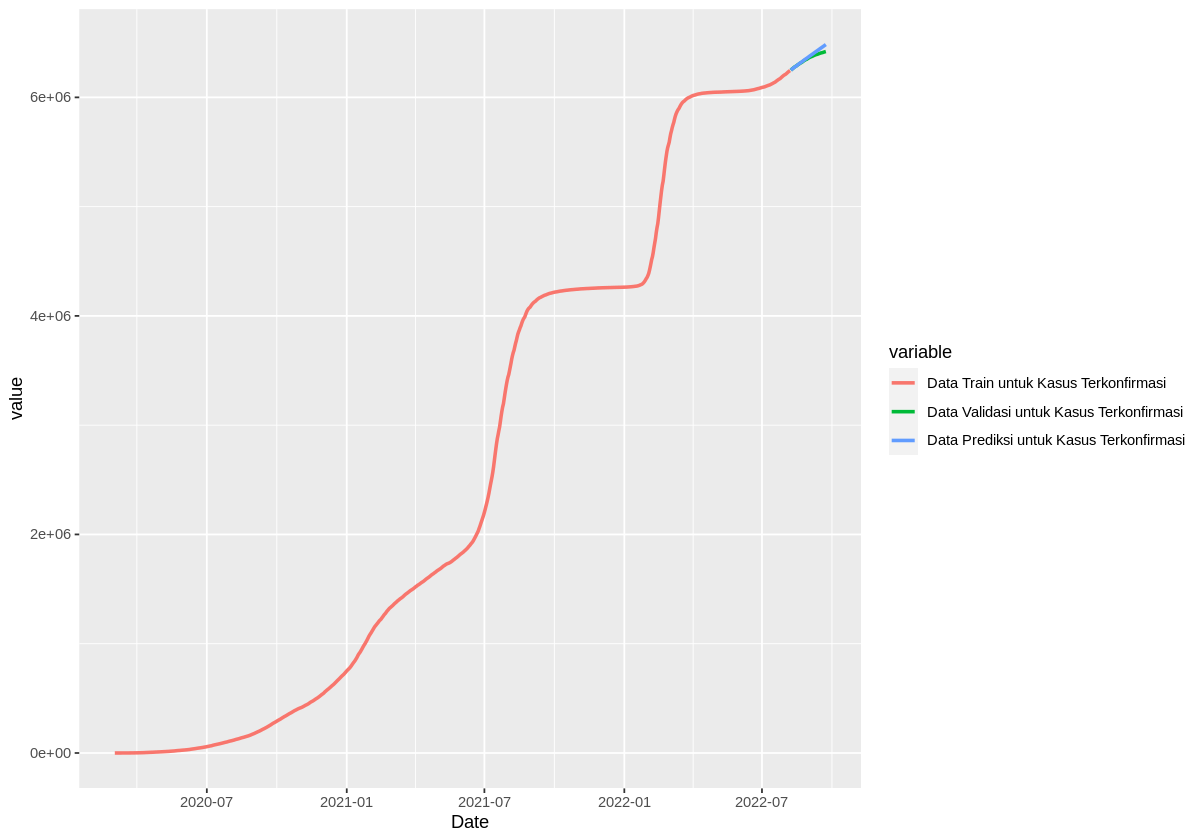

In [ ]:
data <- data.frame(
  date=cov_data$date
)
train_set <- train_set[,c("date","jumlah_positif_kum")]
valid_set <- valid_set[,c("date","jumlah_positif_kum")]
y_pred <- y_pred[,c("date","SARIMAModel")]

data <- merge(x=data,y=train_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=valid_set,by = "date",all.x=TRUE)
data <- merge(x=data,y=y_pred,by = "date",all.x=TRUE)

colnames(data) <- c("Date","Data Train untuk Kasus Terkonfirmasi","Data Validasi untuk Kasus Terkonfirmasi","Data Prediksi untuk Kasus Terkonfirmasi")
data <- melt(data,id="Date")
options(repr.plot.width = 10, repr.plot.height =7)
ggplot(data=data,aes(x=Date,y=value,group=variable))+
  geom_line(aes(color=variable),size=1)